In [1]:
library(readr)
OnlineNewsPopularity <- read_csv("../Data/tim_clean_mashable_data.csv")
#View(OnlineNewsPopularity)

Rows: 39644 Columns: 53
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): url_name, day_of_week, news_category
dbl  (49): timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_n...
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
# head(OnlineNewsPopularity)
summary(OnlineNewsPopularity)
dim(OnlineNewsPopularity)

   url_name              date              timedelta     n_tokens_title
 Length:39644       Min.   :2013-01-07   Min.   :  8.0   Min.   : 2.0  
 Class :character   1st Qu.:2013-07-15   1st Qu.:164.0   1st Qu.: 9.0  
 Mode  :character   Median :2014-02-03   Median :339.0   Median :10.0  
                    Mean   :2014-01-18   Mean   :354.5   Mean   :10.4  
                    3rd Qu.:2014-07-27   3rd Qu.:542.0   3rd Qu.:12.0  
                    Max.   :2014-12-27   Max.   :731.0   Max.   :23.0  
 n_tokens_content n_unique_tokens    n_non_stop_words   
 Min.   :   0.0   Min.   :  0.0000   Min.   :   0.0000  
 1st Qu.: 246.0   1st Qu.:  0.4709   1st Qu.:   1.0000  
 Median : 409.0   Median :  0.5392   Median :   1.0000  
 Mean   : 546.5   Mean   :  0.5482   Mean   :   0.9965  
 3rd Qu.: 716.0   3rd Qu.:  0.6087   3rd Qu.:   1.0000  
 Max.   :8474.0   Max.   :701.0000   Max.   :1042.0000  
 n_non_stop_unique_tokens   num_hrefs      num_self_hrefs       num_imgs      
 Min.   :  0.0000 

[1] 39644    53

In [3]:
library(GGally)
library(ggplot2)
# install.packages("Sleuth3")
library(Sleuth3)
library(GGally)
library(caret)
library(boot)
# install.packages("lmboot")
library(lmboot)
# install.packages('RANN')
library(RANN)
# install.packages('rgl')
library(rgl)
# install.packages('FNN')
library(FNN)
library(ggplot2)
# install.packages('dplyr')
library(dplyr)

data_types <- sapply(OnlineNewsPopularity, class)
print(data_types)


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




                    url_name                         date 
                 "character"                       "Date" 
                   timedelta               n_tokens_title 
                   "numeric"                    "numeric" 
            n_tokens_content              n_unique_tokens 
                   "numeric"                    "numeric" 
            n_non_stop_words     n_non_stop_unique_tokens 
                   "numeric"                    "numeric" 
                   num_hrefs               num_self_hrefs 
                   "numeric"                    "numeric" 
                    num_imgs                   num_videos 
                   "numeric"                    "numeric" 
        average_token_length                 num_keywords 
                   "numeric"                    "numeric" 
                  kw_min_min                   kw_max_min 
                   "numeric"                    "numeric" 
                  kw_avg_min                   kw_min_ma

In [4]:


# average token length
# gl2 <- ggplot(OnlineNewsPopularity, aes(x = factor(year), y = average_token_length)) +
#   geom_point() + geom_smooth(method = "loess", size = 1, span = 1) +
#   ggtitle("average_token_length")
# print(gl1)

# # now lets get the correlation of average_token_length versus year
# # Calculate the correlation between 'average_token_length' and 'year'
# correlation <- cor(OnlineNewsPopularity$average_token_length, as.numeric(OnlineNewsPopularity$year))

# # Print the correlation coefficient
# print(correlation)

# ### A weak correleation coeffificient between average_token_length and year ###

`geom_smooth()` using formula = 'y ~ x'


[1] -0.8764035


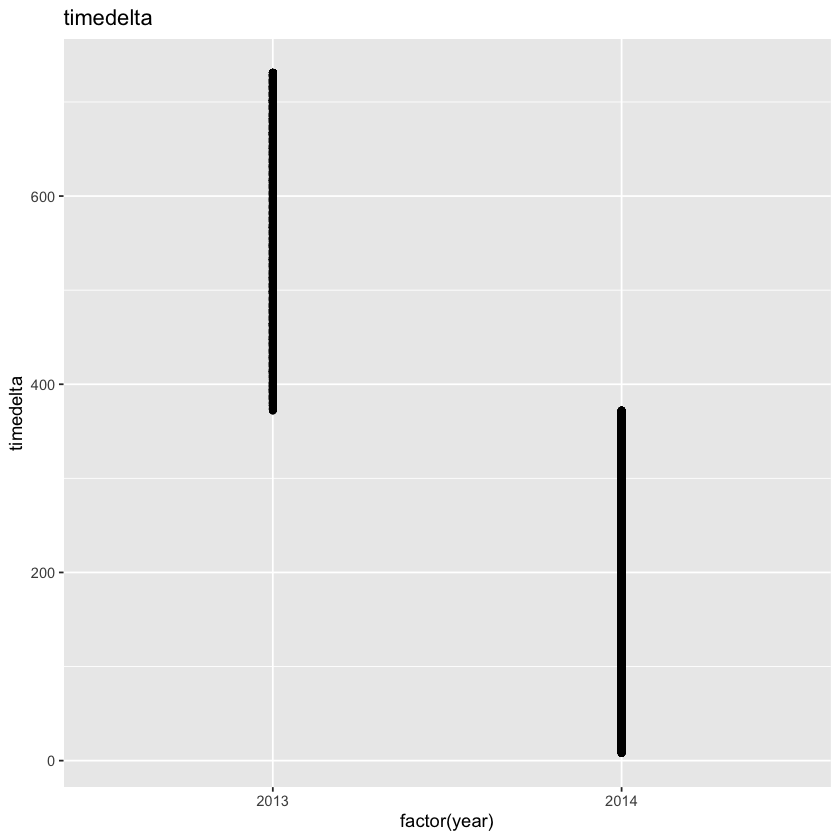

In [9]:
gl3 <- ggplot(OnlineNewsPopularity, aes(x = factor(year), y = timedelta)) +
  geom_point() +
  geom_smooth(method = "loess", size = 1, span = 1) +
  ggtitle("timedelta")
print(gl3)
# now lets get the correlation of average_token_length versus year
# Calculate the correlation between 'average_token_length' and 'year'
correlation <- cor(OnlineNewsPopularity$timedelta, as.numeric(OnlineNewsPopularity$year))

# The correlation coefficient indicates a strong negative correlation between timedelta and year 
print(correlation)

`geom_smooth()` using formula = 'y ~ x'


[1] 0.2186334


`geom_smooth()` using formula = 'y ~ x'


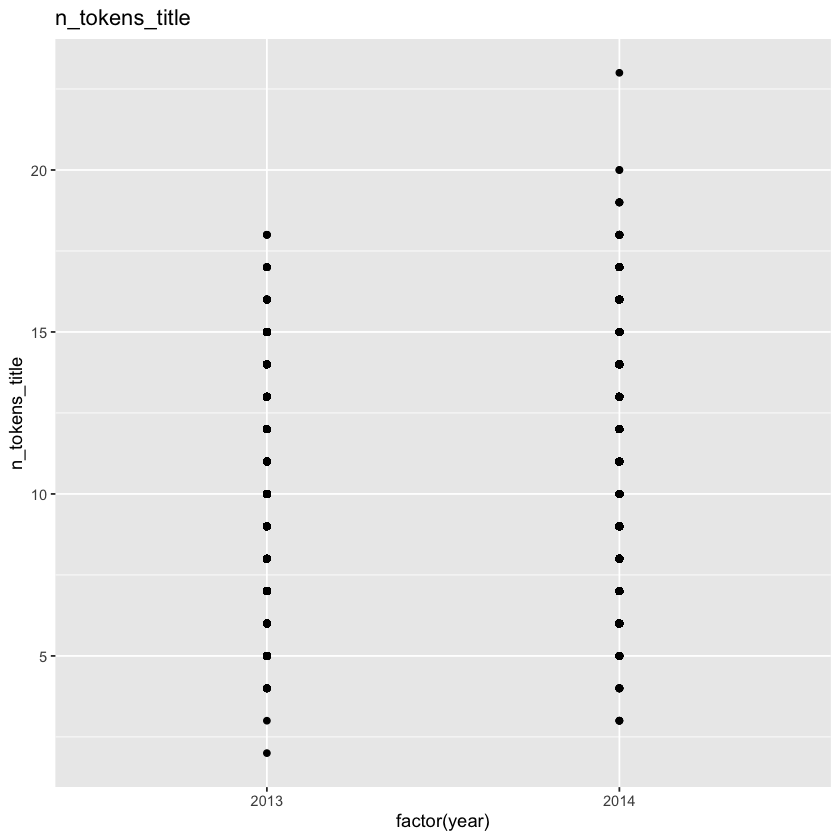

[1] 0.06510425


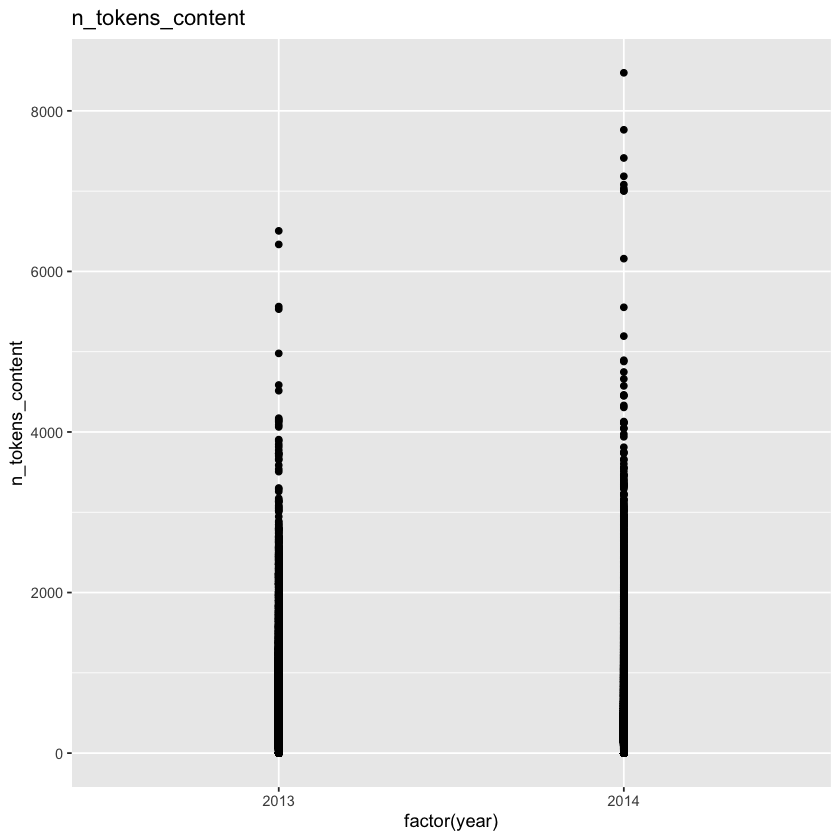

In [10]:
gl2 <- ggplot(OnlineNewsPopularity, aes(x = factor(year), y = n_tokens_title)) +
  geom_point() +
  geom_smooth(method = "loess", size = 1, span = 1) +
  ggtitle("n_tokens_title")
print(gl2)
# now lets get the correlation of average_token_length versus year
# Calculate the correlation between 'average_token_length' and 'year'
correlation <- cor(OnlineNewsPopularity$n_tokens_title, as.numeric(OnlineNewsPopularity$year))


print(correlation)

gl2 <- ggplot(OnlineNewsPopularity, aes(x = factor(year), y = n_tokens_content)) +
  geom_point() +
  geom_smooth(method = "loess", size = 1, span = 1) +
  ggtitle("n_tokens_content")
print(gl2)
# now lets get the correlation of average_token_length versus year
# Calculate the correlation between 'average_token_length' and 'year'
correlation <- cor(OnlineNewsPopularity$n_tokens_content, as.numeric(OnlineNewsPopularity$year))

# The correlation coefficient indicates a strong negative correlation between timedelta and year 
print(correlation)



In [11]:
# year versus all variables - correlation coeffcients

#Select the numeric columns you want to include in the correlation analysis
numeric_columns <- OnlineNewsPopularity[, sapply(OnlineNewsPopularity, is.numeric)]

# Calculate the correlation coefficients with 'year'
correlation_with_year <- cor(numeric_columns, OnlineNewsPopularity$year)

correlation_data_year <- data.frame(
  Column = colnames(numeric_columns),
  Correlation = correlation_with_year
)

# Sort the data frame by Correlation in descending order
sorted_correlation_data_year <- correlation_data_year[order(-correlation_data_year$Correlation), ]

print("Correlation with 'year':")
print(sorted_correlation_data_year)

[1] "Correlation with 'year':"
                                                   Column   Correlation
year                                                 year  1.0000000000
kw_max_max                                     kw_max_max  0.4577996373
kw_avg_max                                     kw_avg_max  0.3943908293
n_tokens_title                             n_tokens_title  0.2186333605
kw_avg_avg                                     kw_avg_avg  0.1418432797
kw_min_avg                                     kw_min_avg  0.1388378440
LDA_02                                             LDA_02  0.1334353845
rate_negative_words                   rate_negative_words  0.0837427598
kw_min_max                                     kw_min_max  0.0727561801
n_tokens_content                         n_tokens_content  0.0651042527
max_negative_polarity               max_negative_polarity  0.0624947779
num_imgs                                         num_imgs  0.0551179375
month                            

In [ ]:
df.info

In [12]:
# is_weekend versus all variables - correlation coeffcients
OnlineNewsPopularity$is_weekend.Num <- ifelse(OnlineNewsPopularity$is_weekend == 1, "weekend", "weekday")


# # Check the data types of all columns
column_types <- sapply(OnlineNewsPopularity, class)

# Select the numeric columns you want to include in the correlation analysis
numeric_columns <- OnlineNewsPopularity[, column_types == "numeric"]

# Calculate the correlation coefficients with 'month'
correlation_with_is_weekend<- sapply(numeric_columns, function(column) {
  cor(OnlineNewsPopularity$is_weekend, column)
})

# Create a data frame with column names and correlation coefficients
correlation_data_is_weekend <- data.frame(
  Column = colnames(numeric_columns),
  Correlation = correlation_with_is_weekend
)

# Sort the data frame by Correlation in descending order
sorted_correlation_data_is_weekend <- correlation_data_is_weekend[order(-correlation_data_is_weekend$Correlation), ]

# # Print the sorted correlation coefficients with column names for 'month'
print("Correlation with 'is_weekend':")
print(sorted_correlation_data_is_weekend)


[1] "Correlation with 'is_weekend':"
                                                   Column   Correlation
is_weekend                                     is_weekend  1.0000000000
num_keywords                                 num_keywords  0.0746465812
num_hrefs                                       num_hrefs  0.0722793005
num_imgs                                         num_imgs  0.0532416211
n_tokens_content                         n_tokens_content  0.0520235752
num_self_hrefs                             num_self_hrefs  0.0477975191
kw_avg_avg                                     kw_avg_avg  0.0447459918
kw_min_avg                                     kw_min_avg  0.0442020240
max_positive_polarity               max_positive_polarity  0.0381715369
abs_title_sentiment_polarity abs_title_sentiment_polarity  0.0364898494
global_rate_positive_words     global_rate_positive_words  0.0347300588
title_sentiment_polarity         title_sentiment_polarity  0.0323432181
avg_positive_polarity      

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


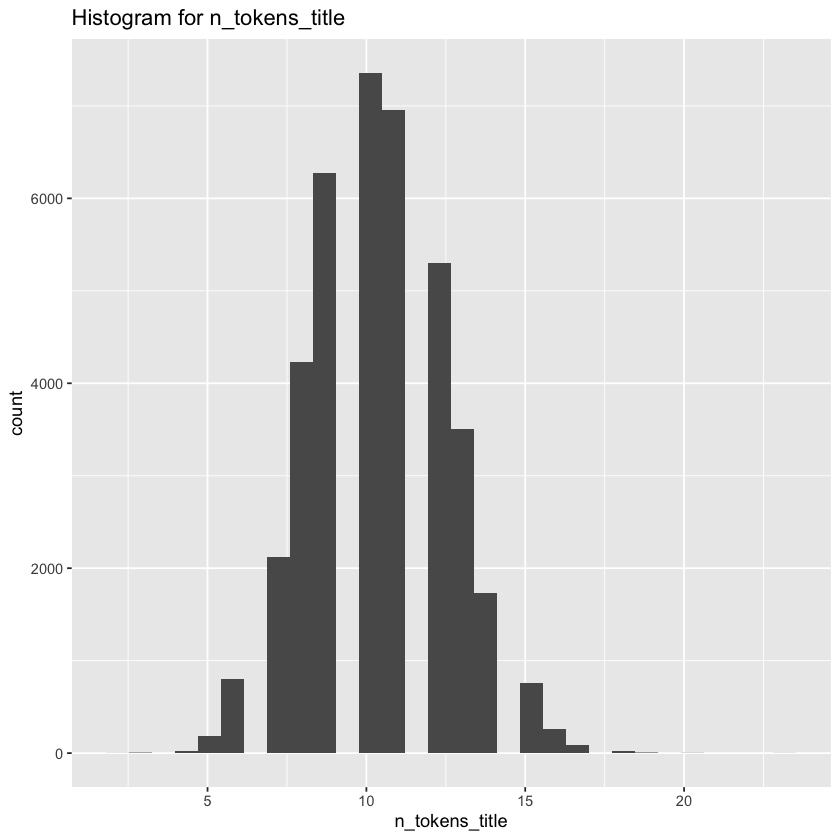

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


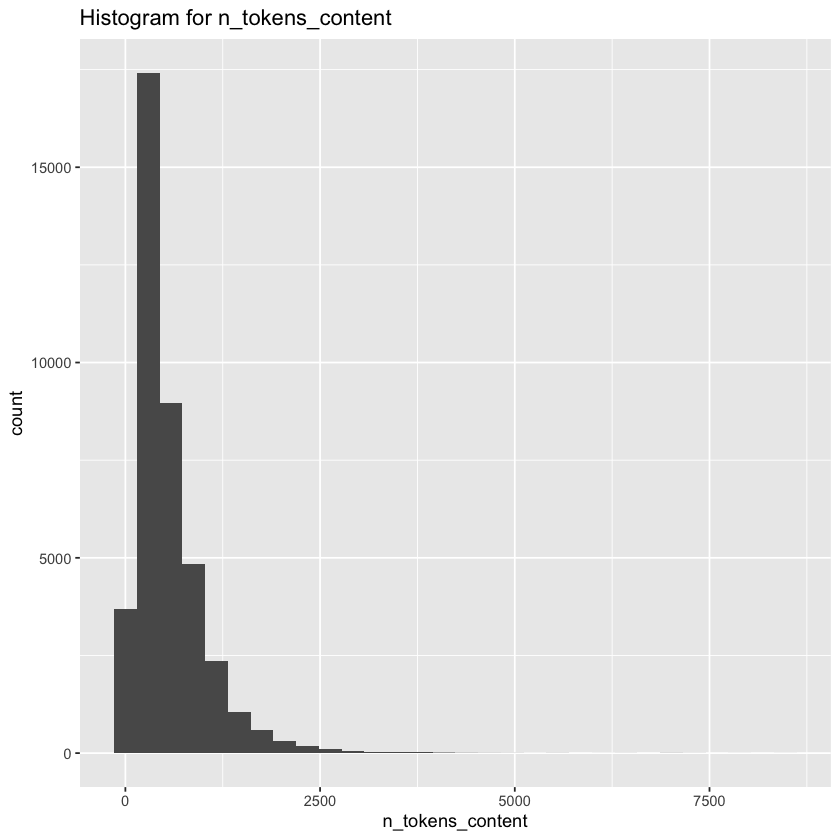

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


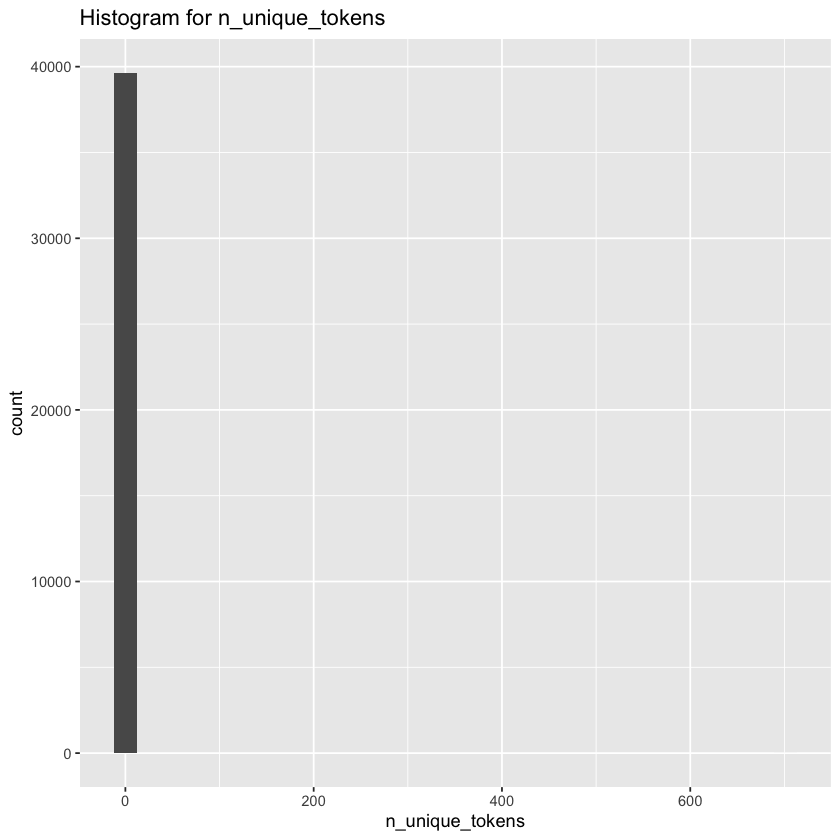

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


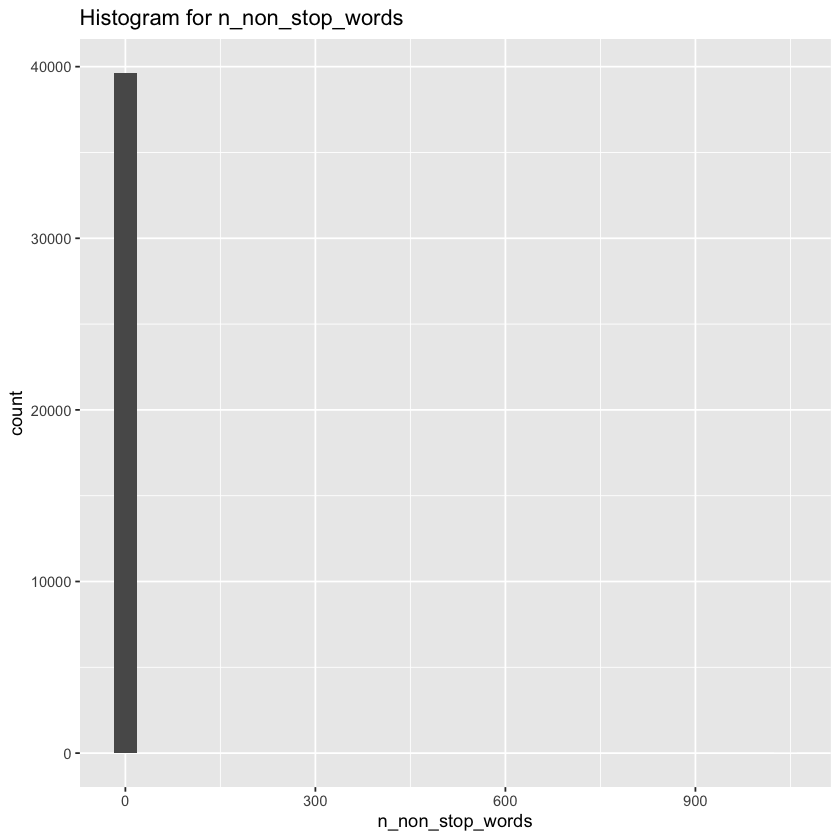

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


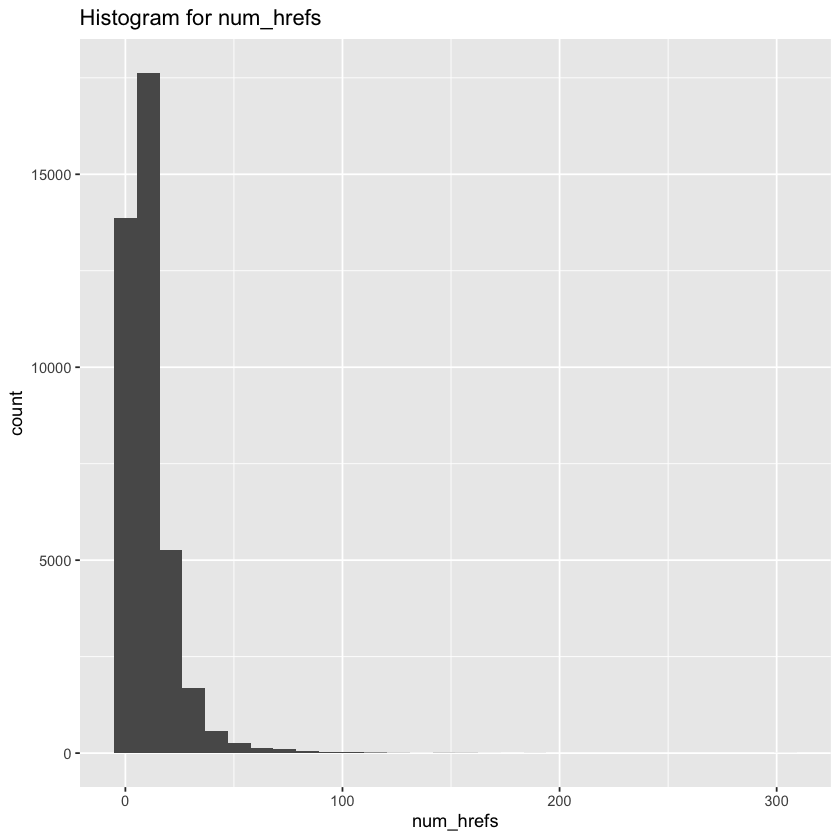

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


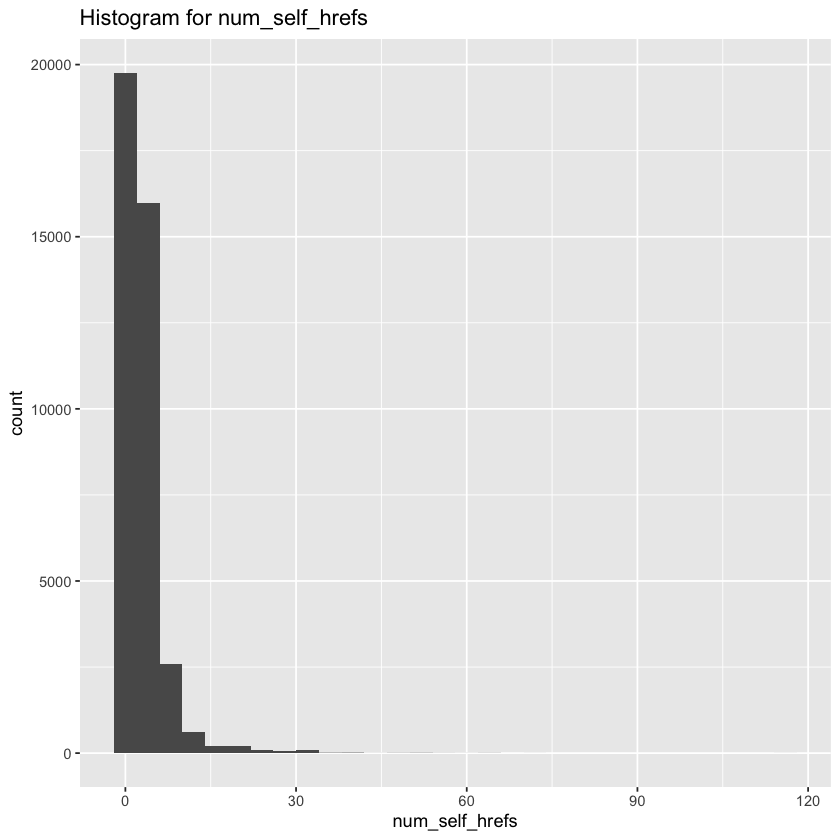

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


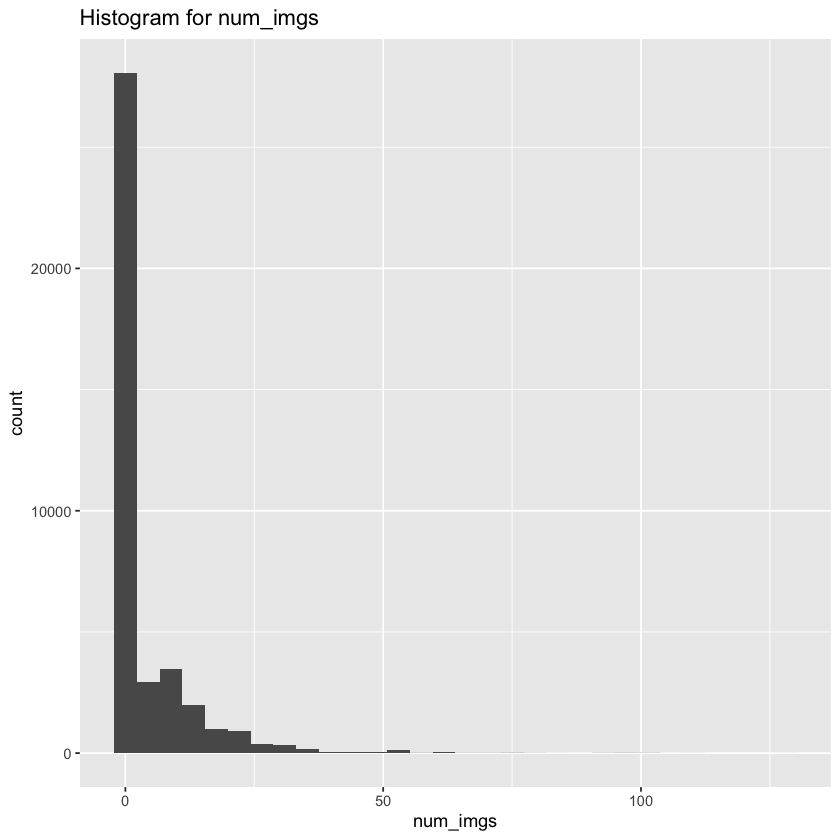

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


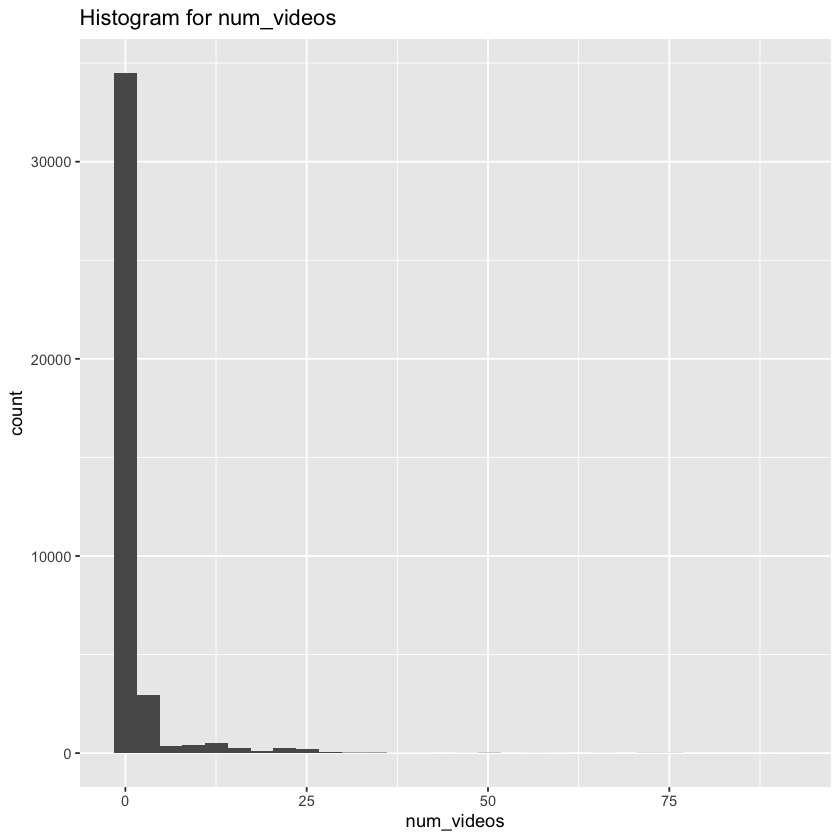

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


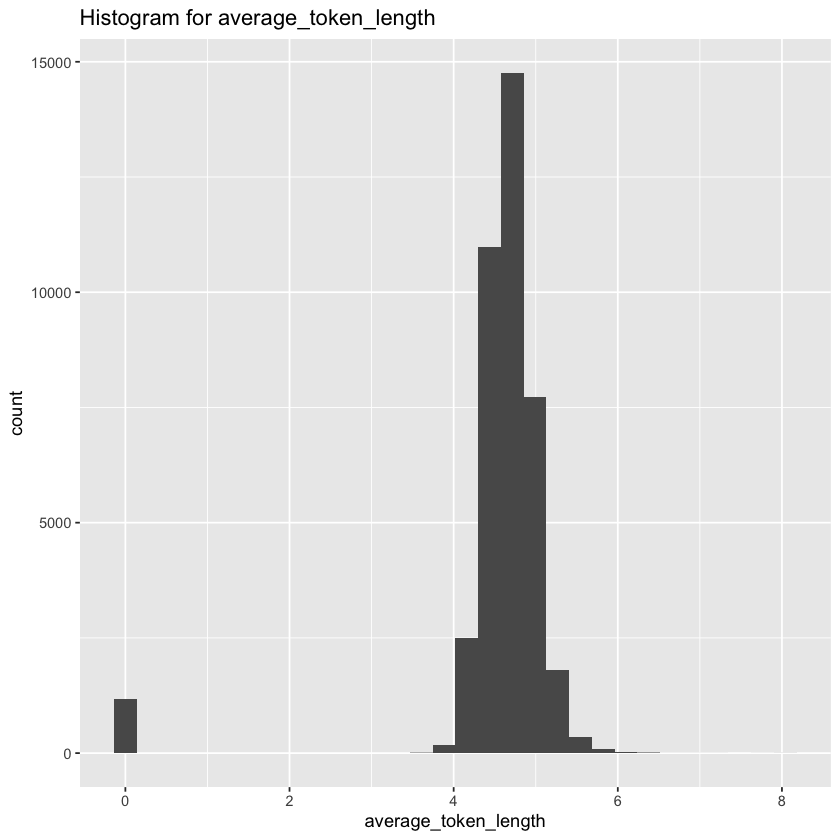

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


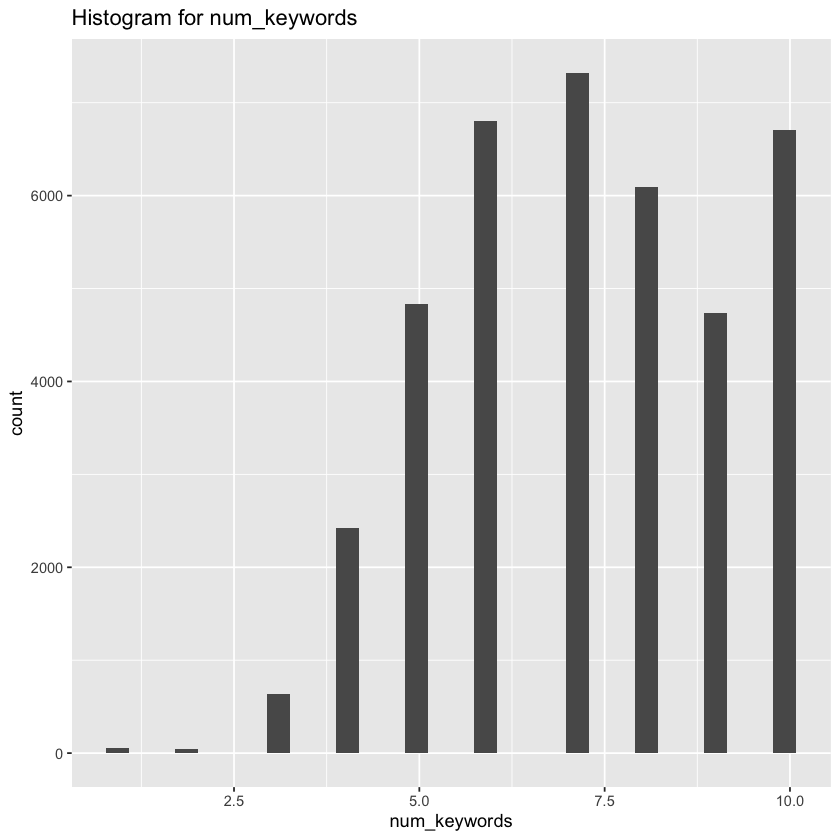

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


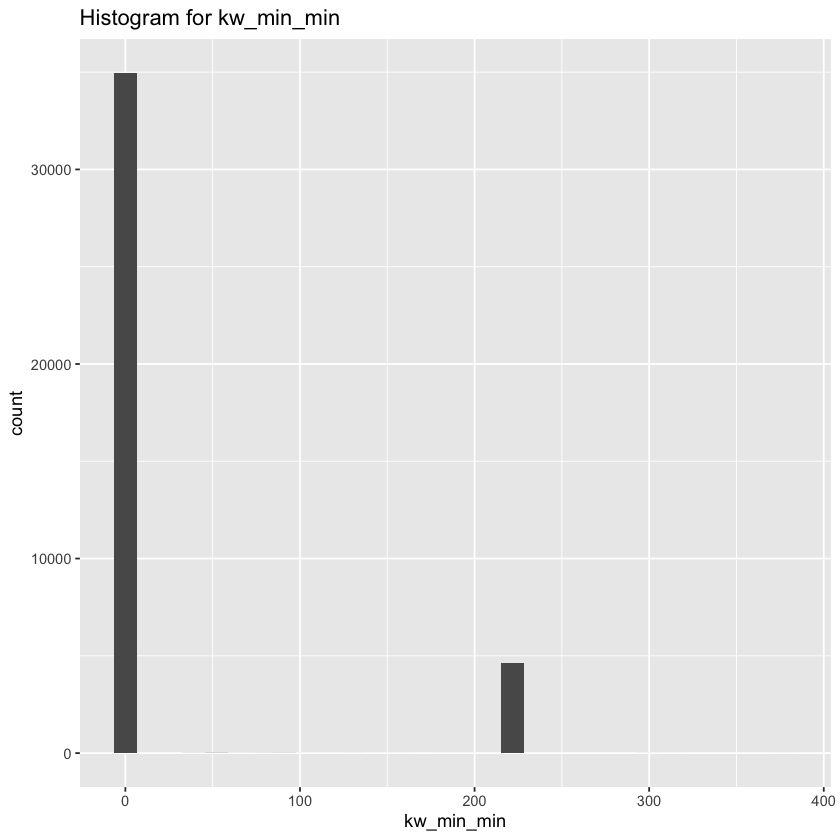

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


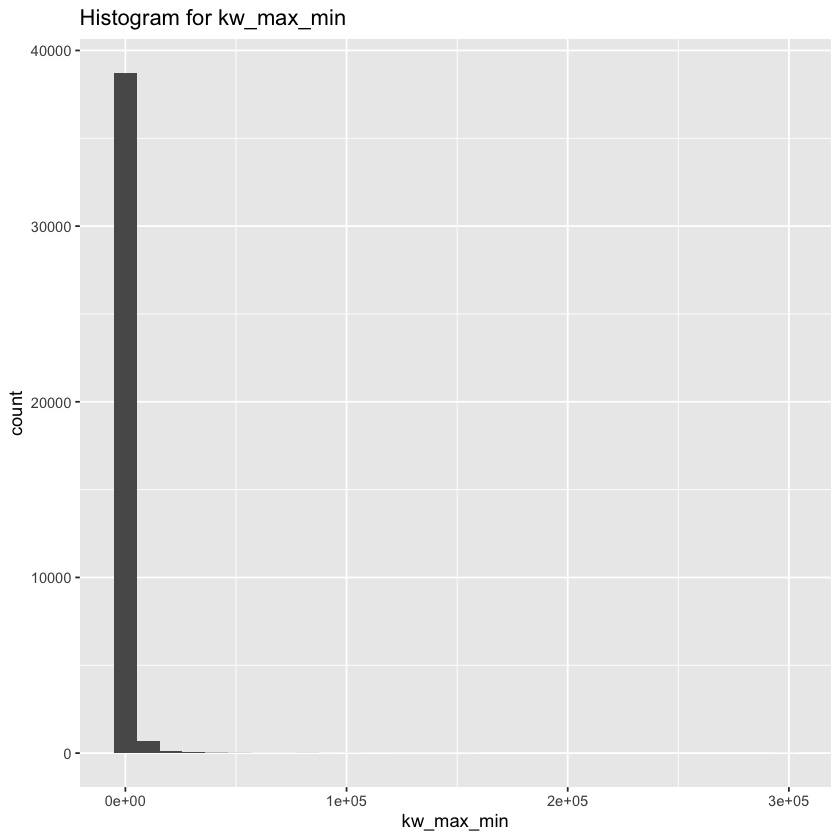

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


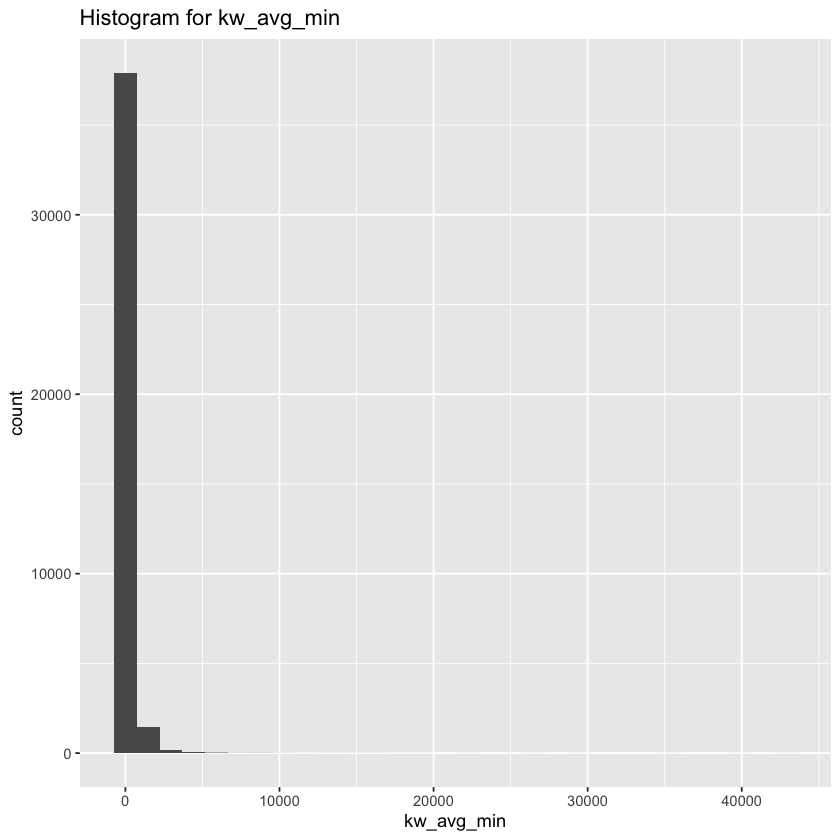

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


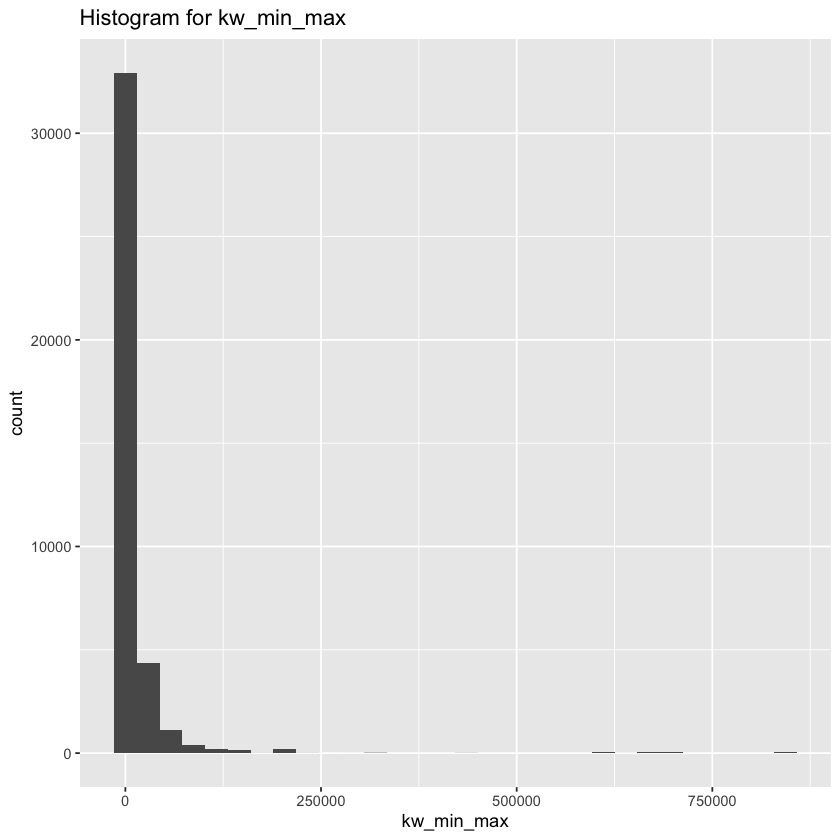

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


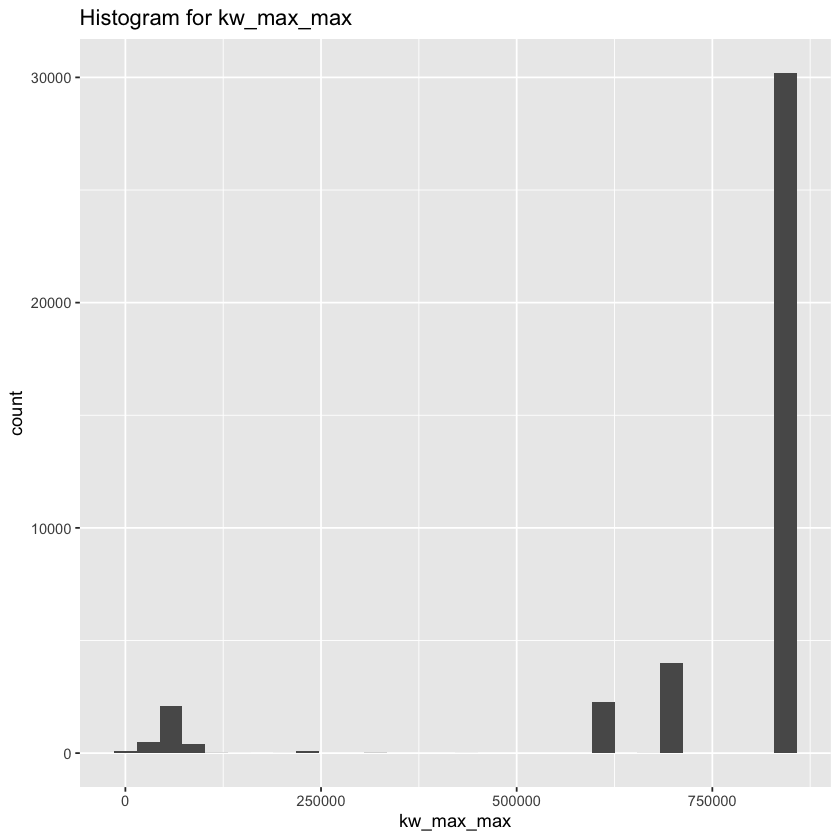

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


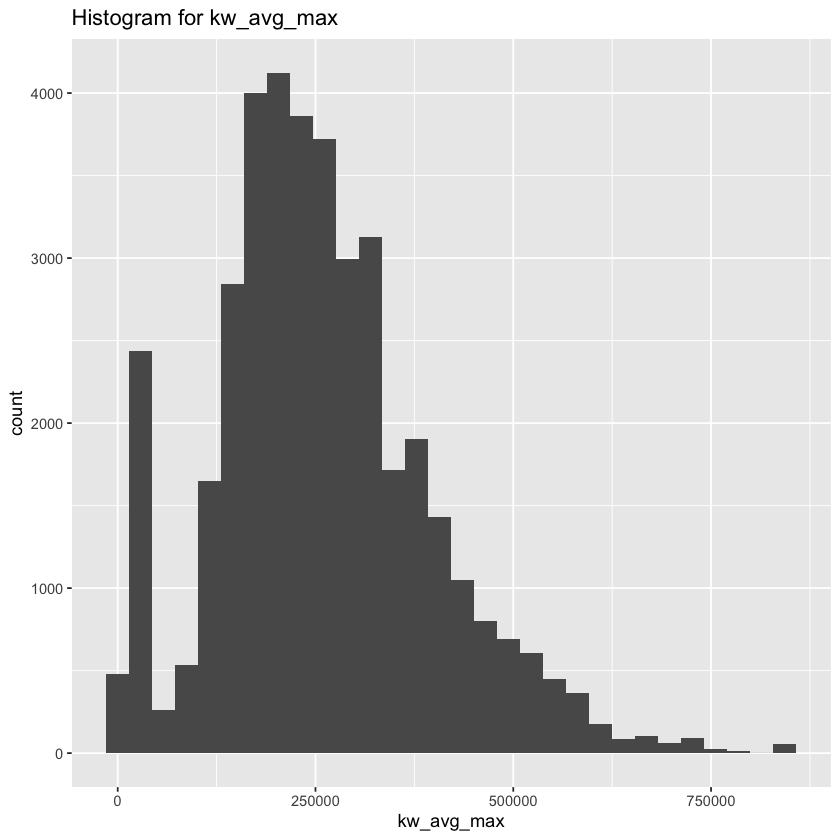

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


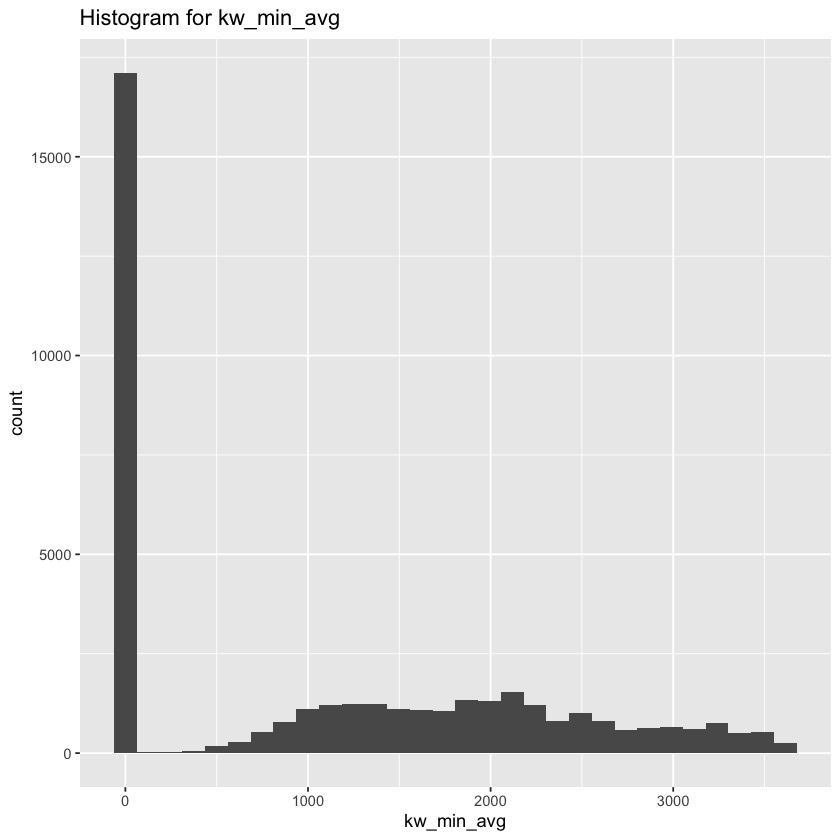

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


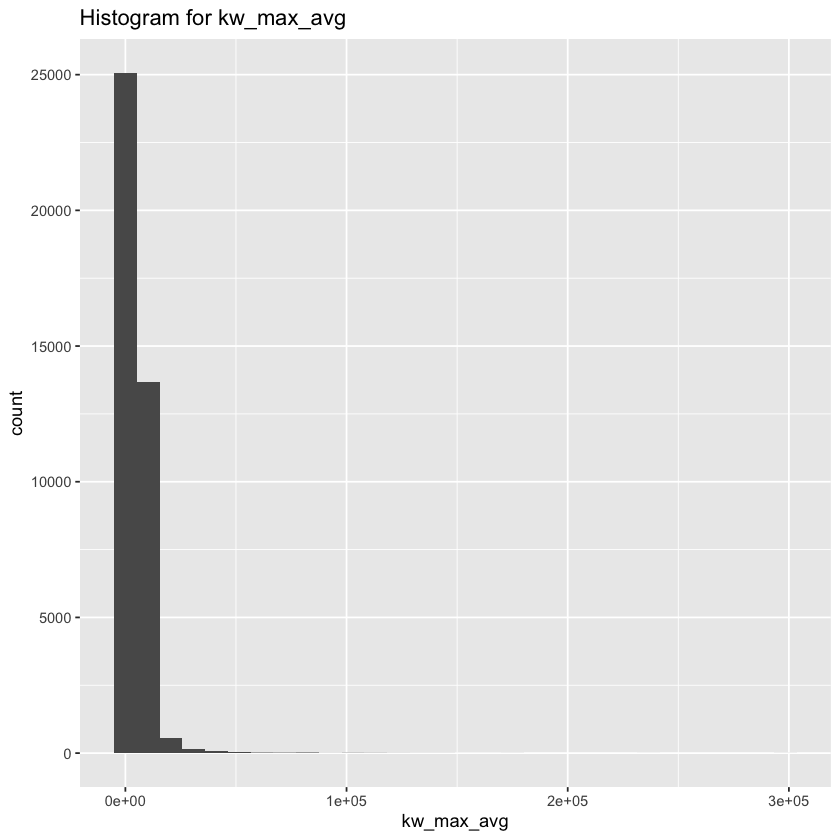

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


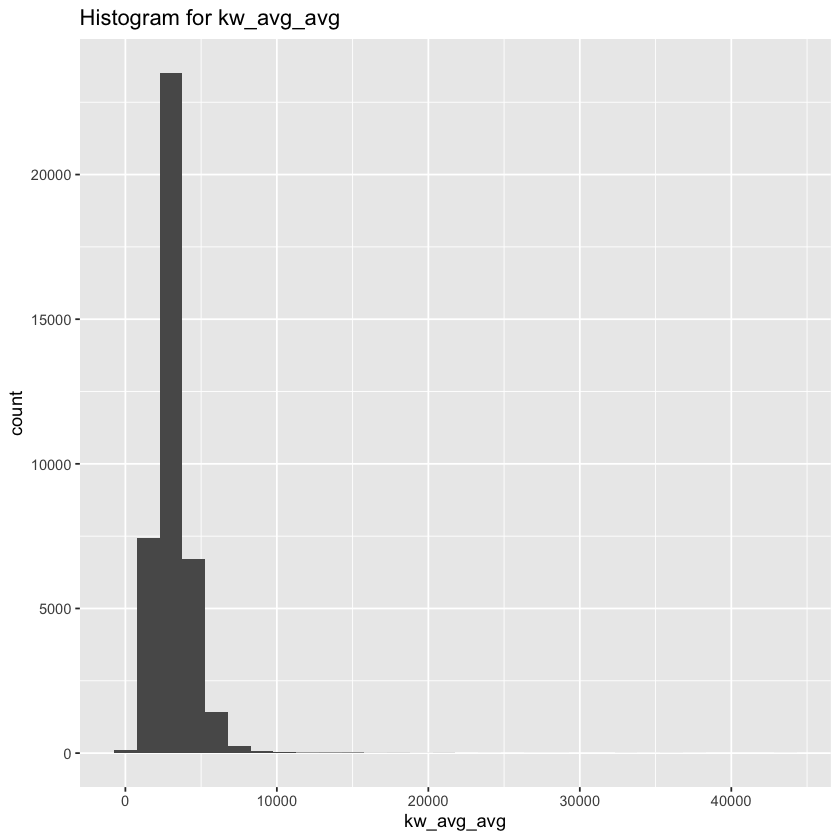

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


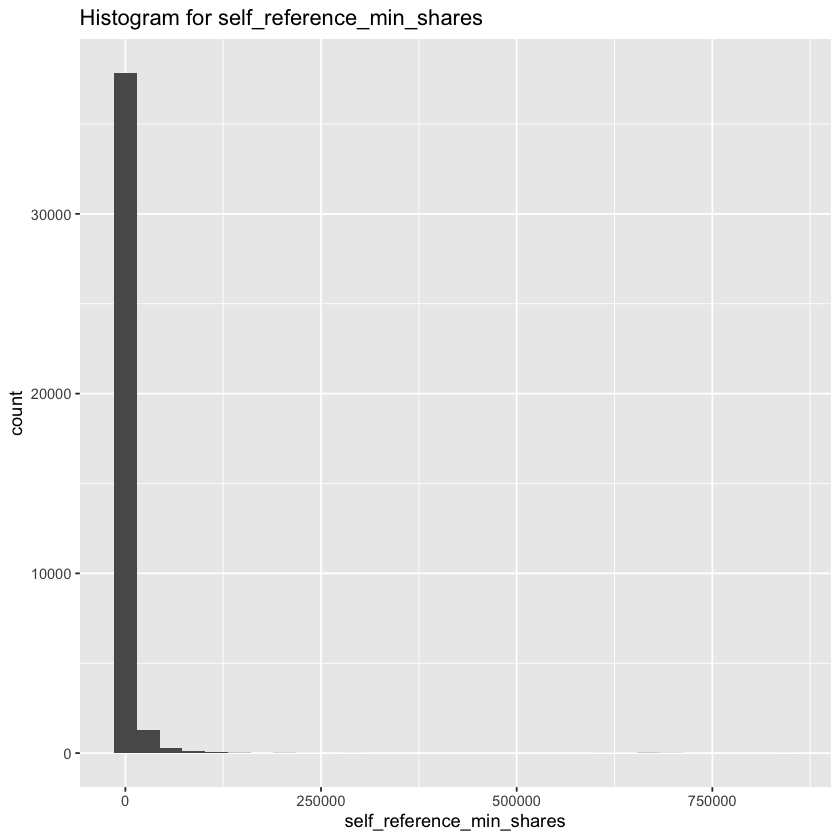

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


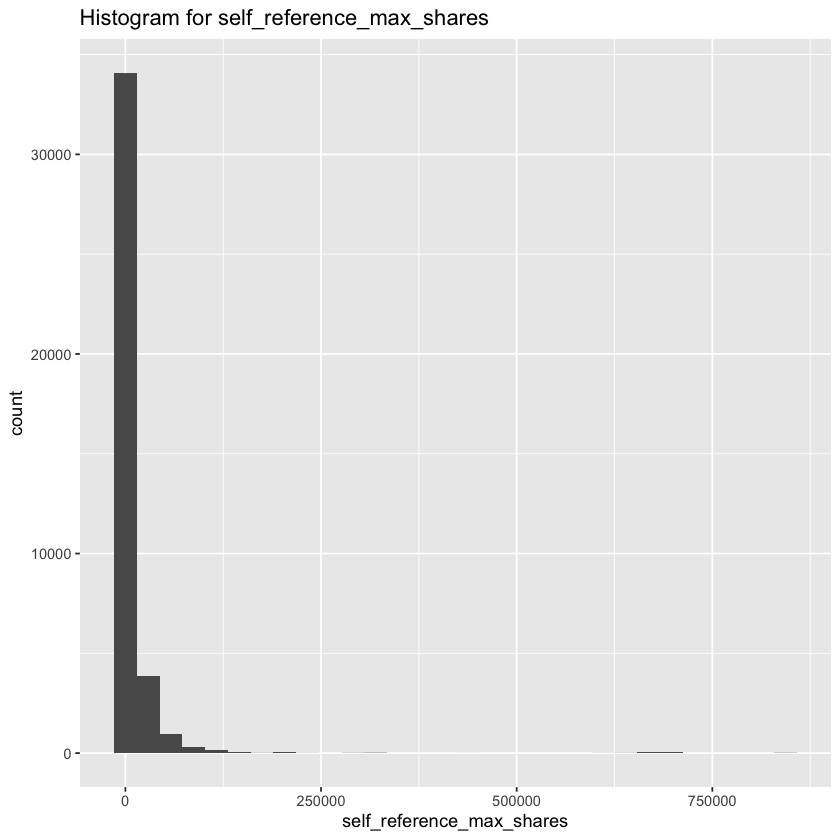

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


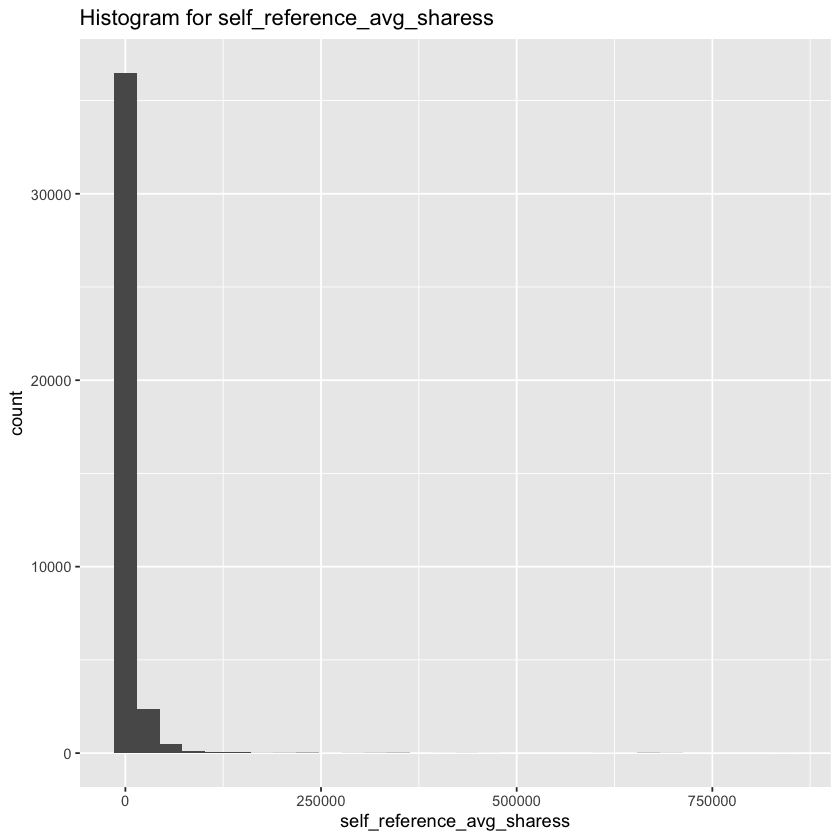

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


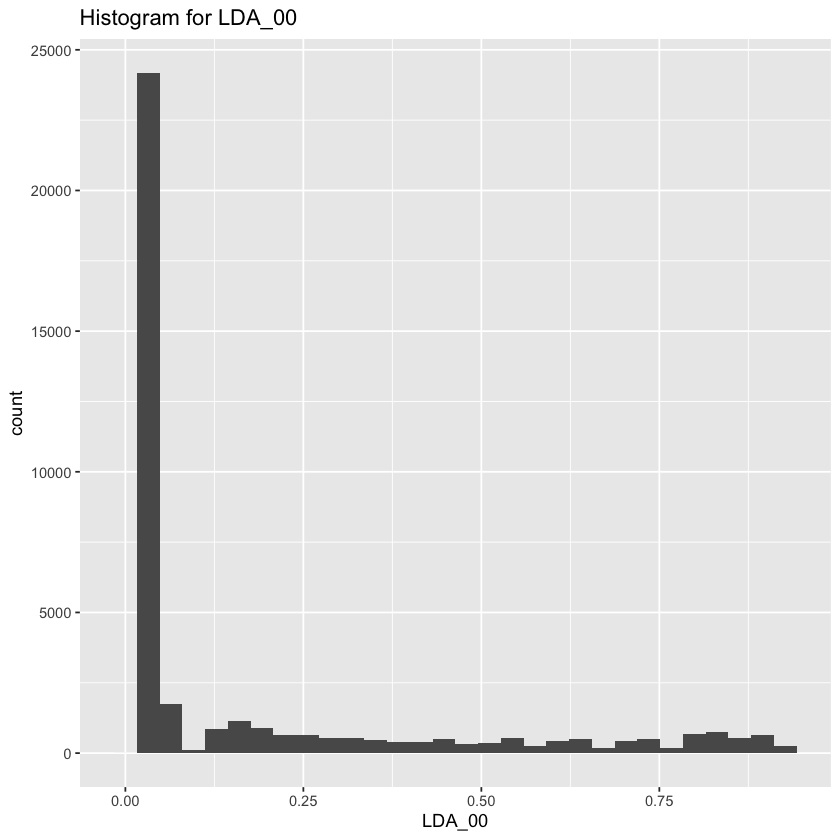

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


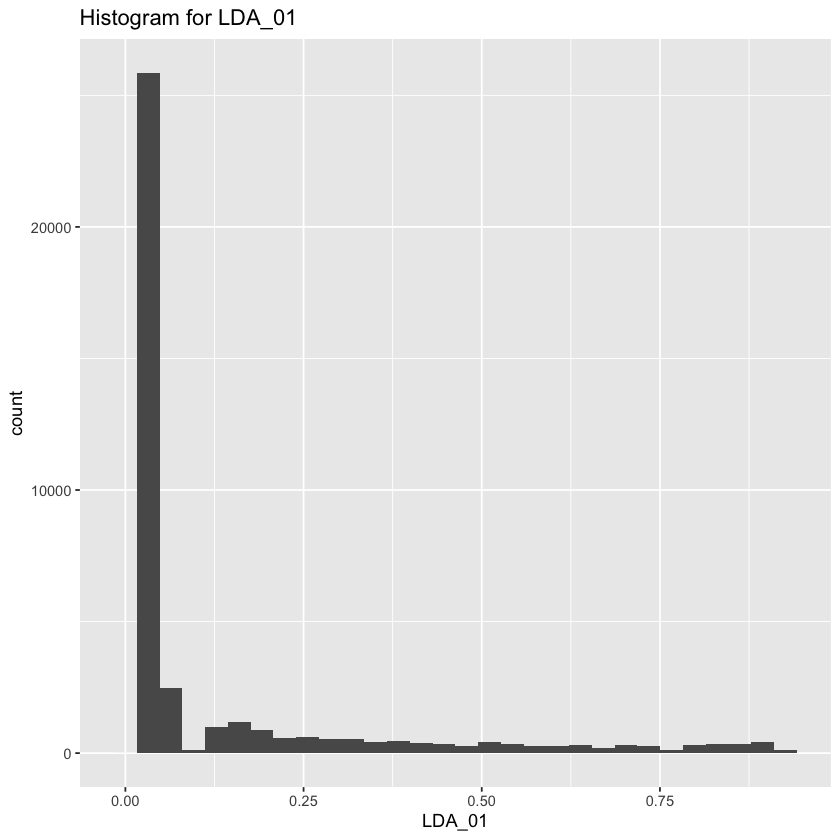

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


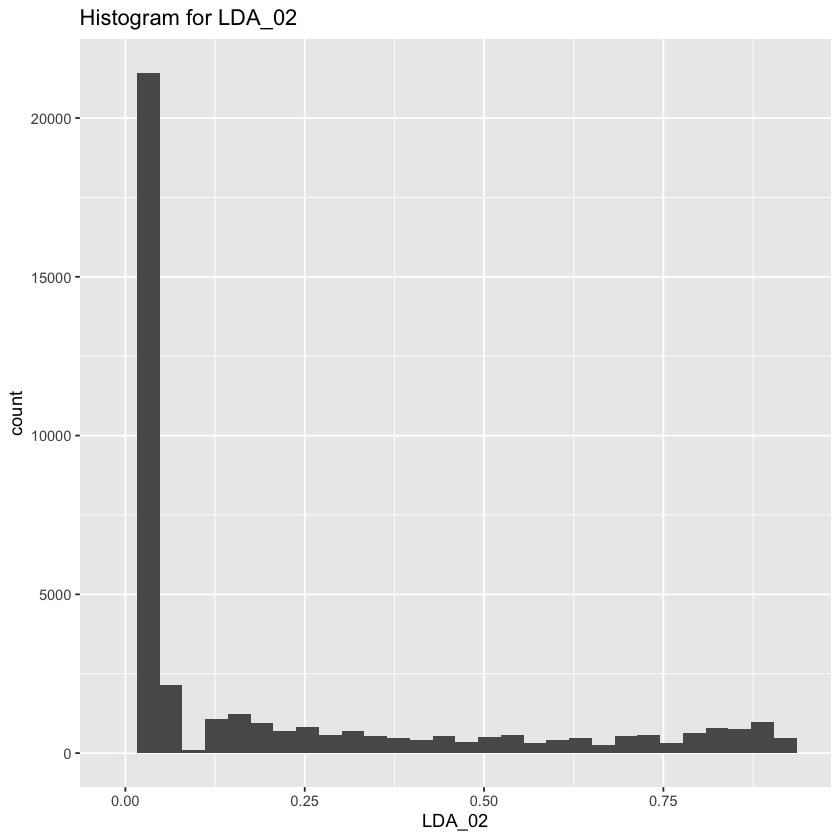

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


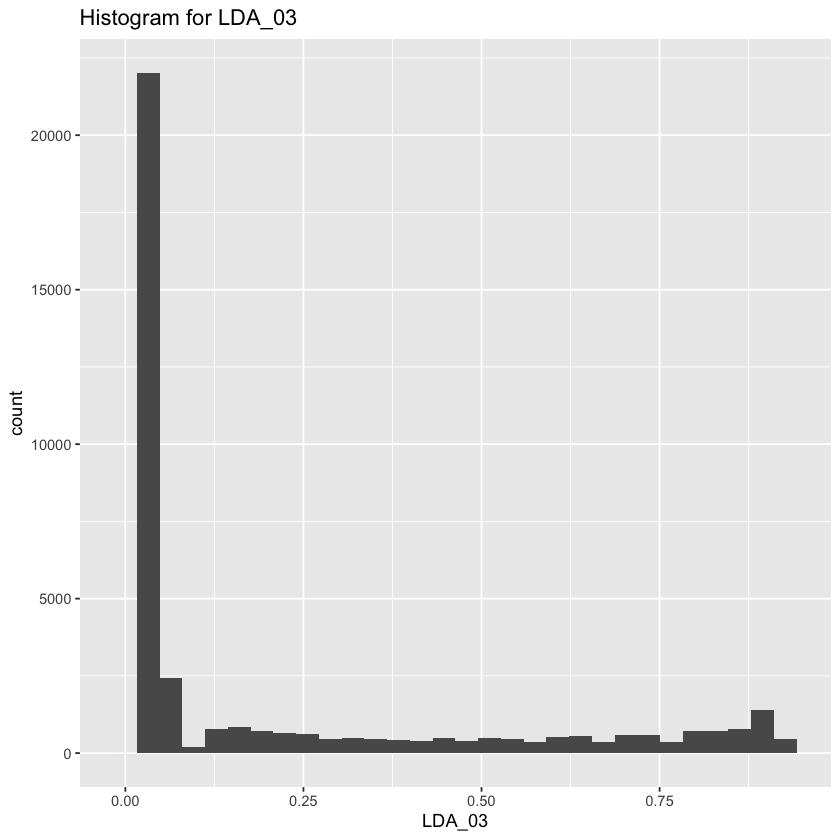

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


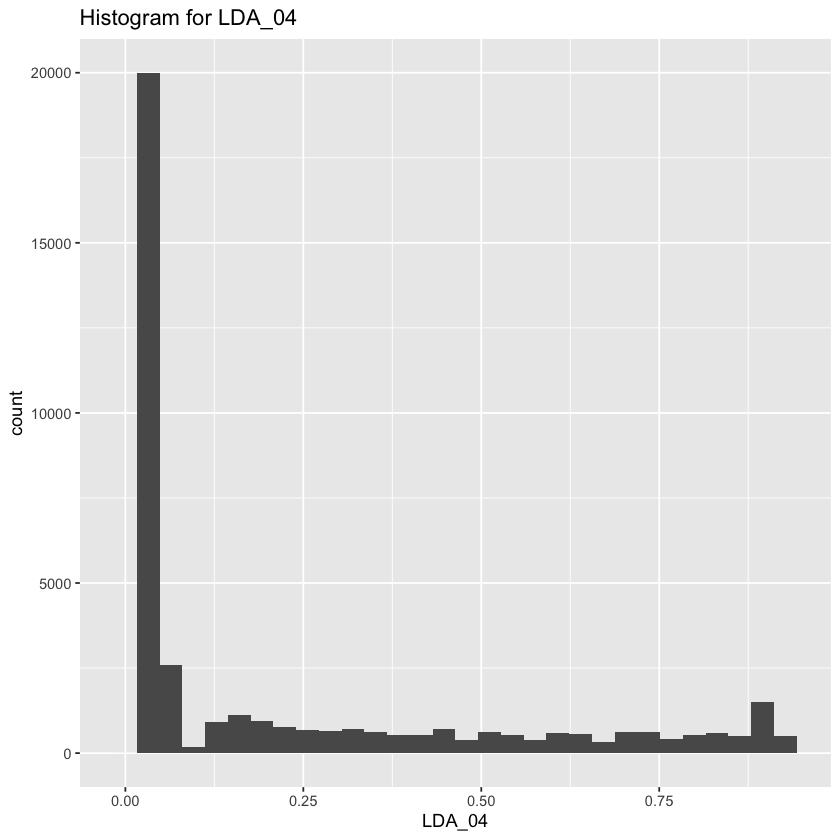

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


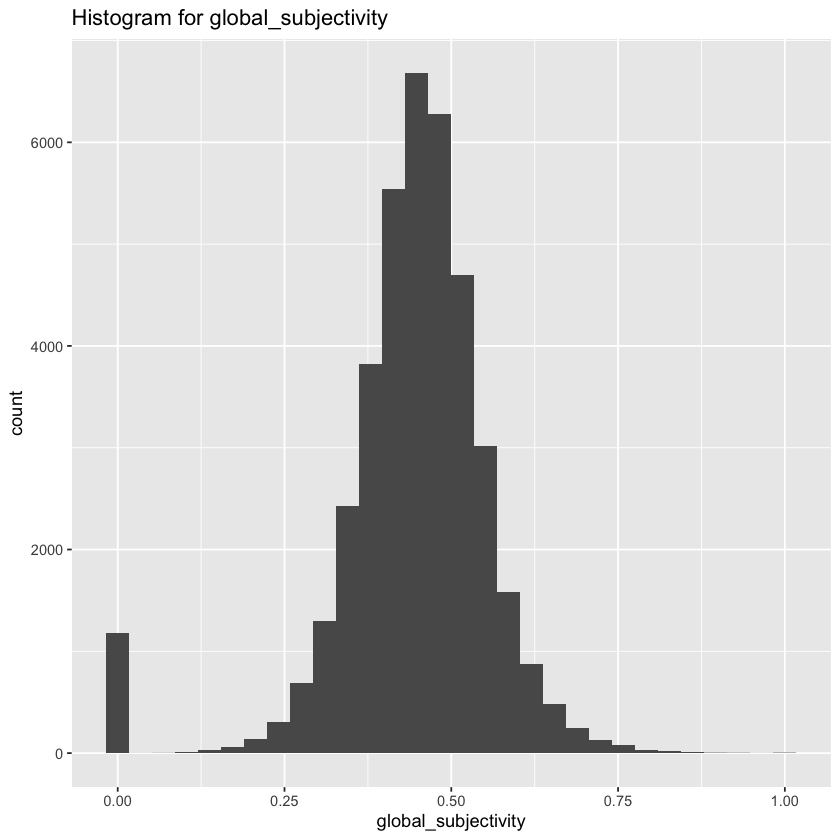

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


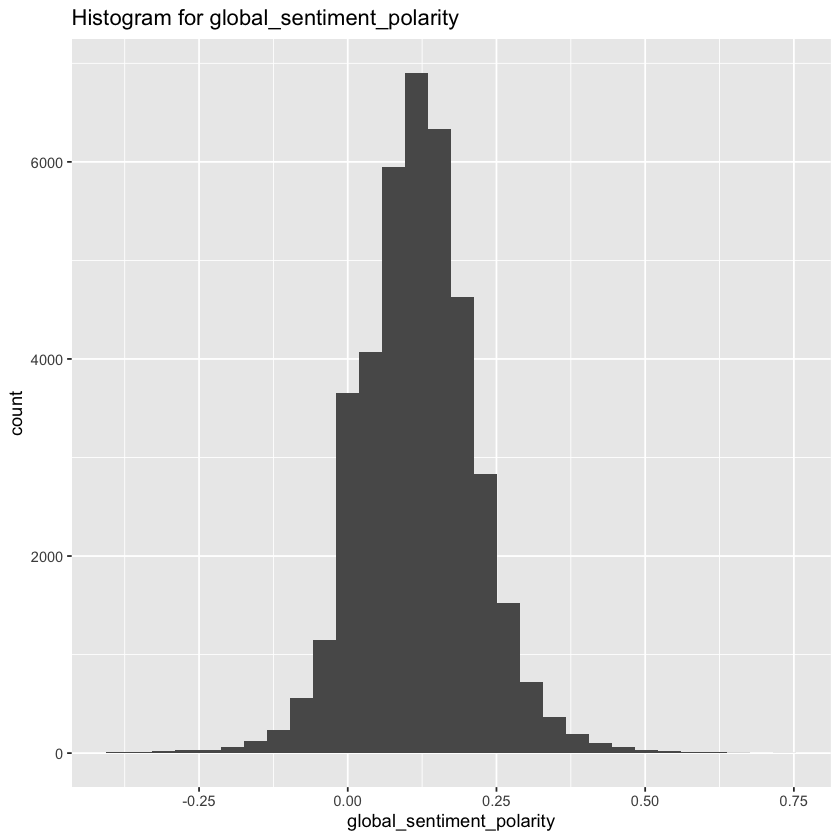

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


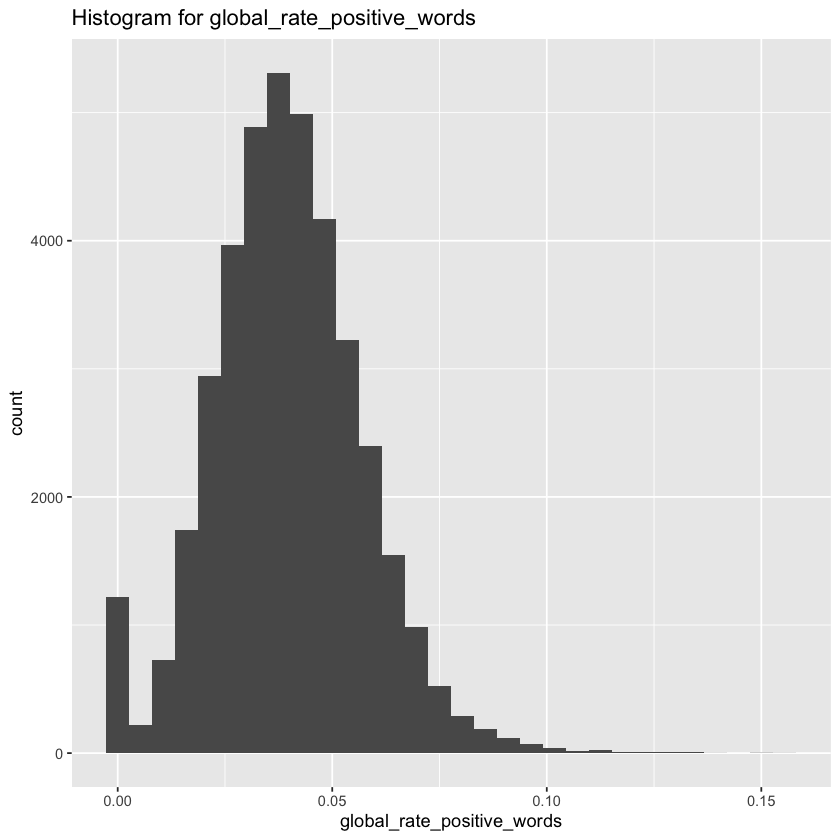

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


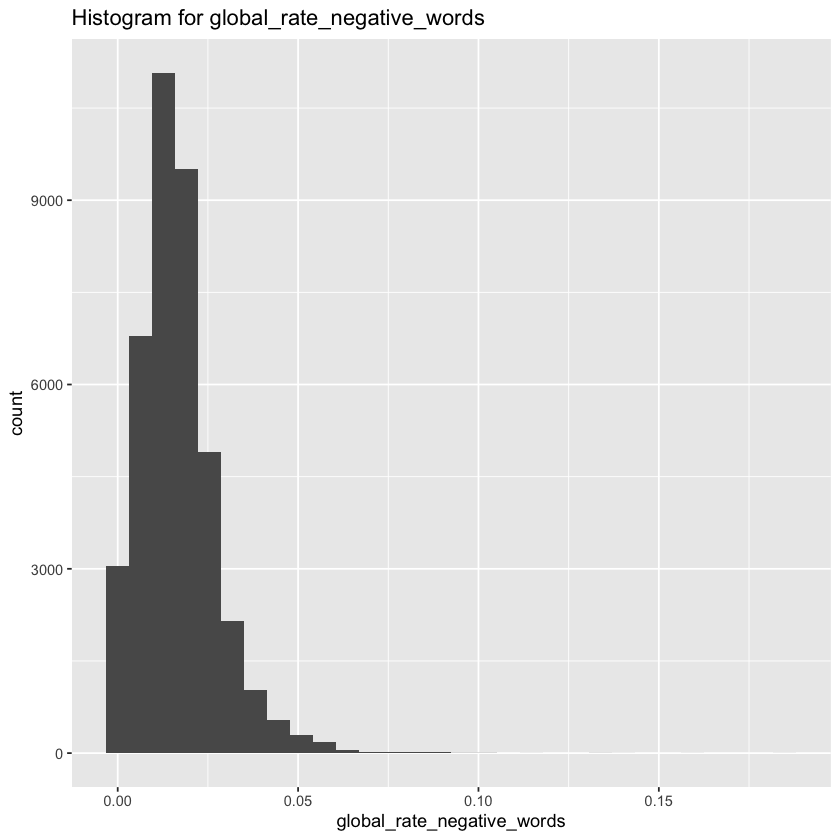

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


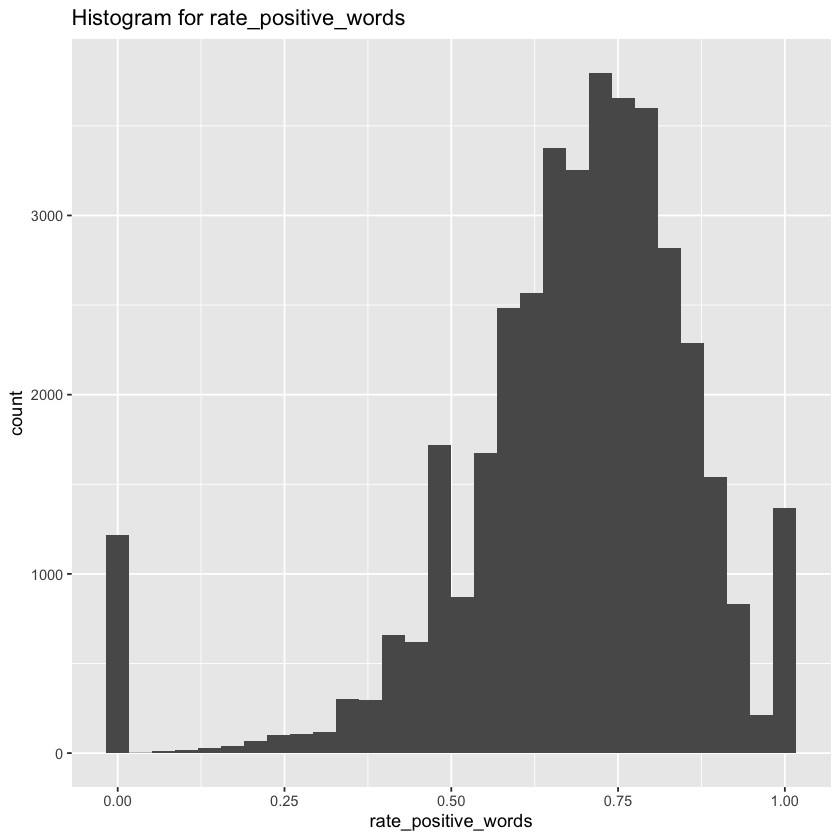

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


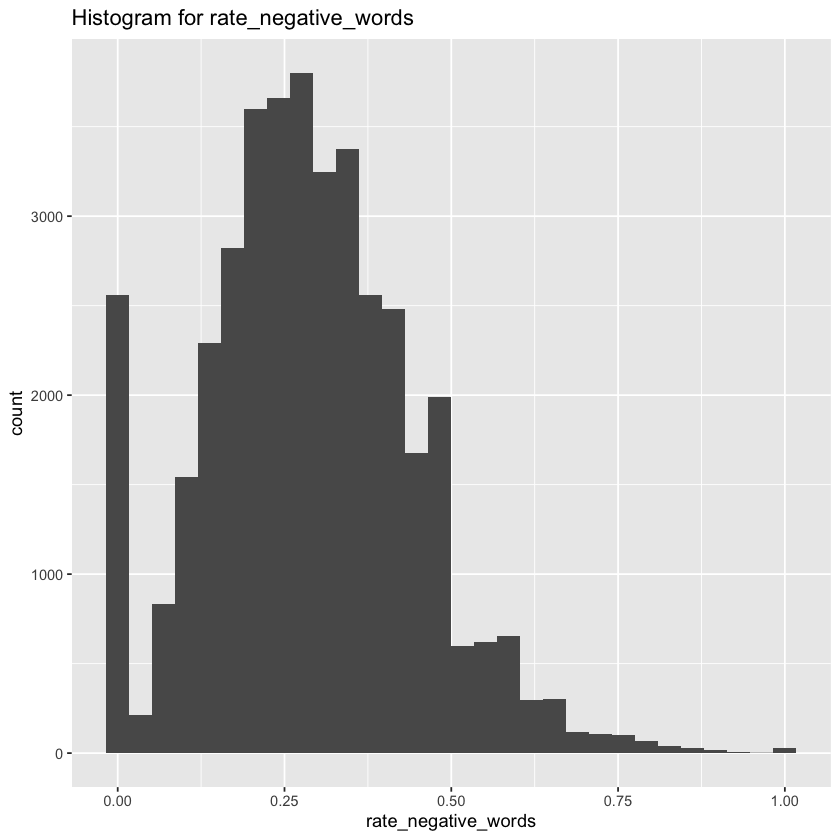

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


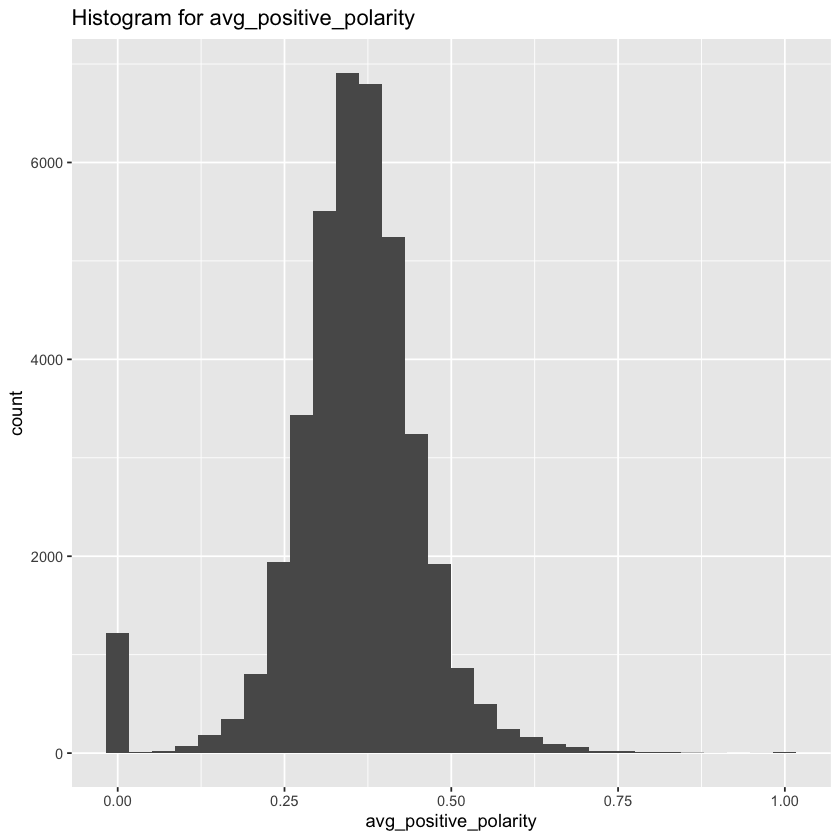

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


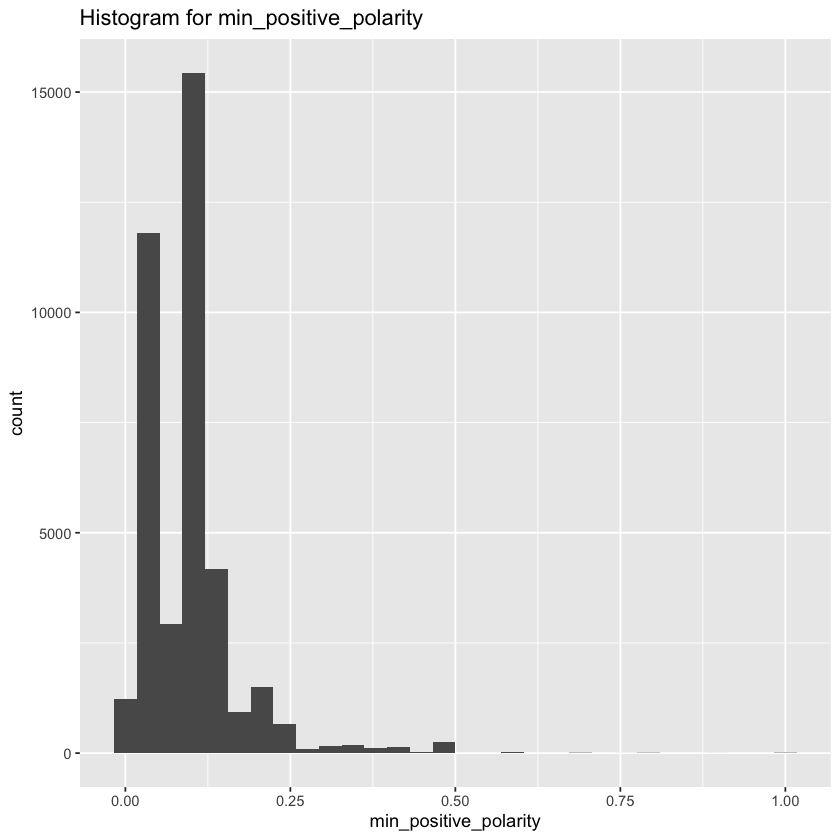

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


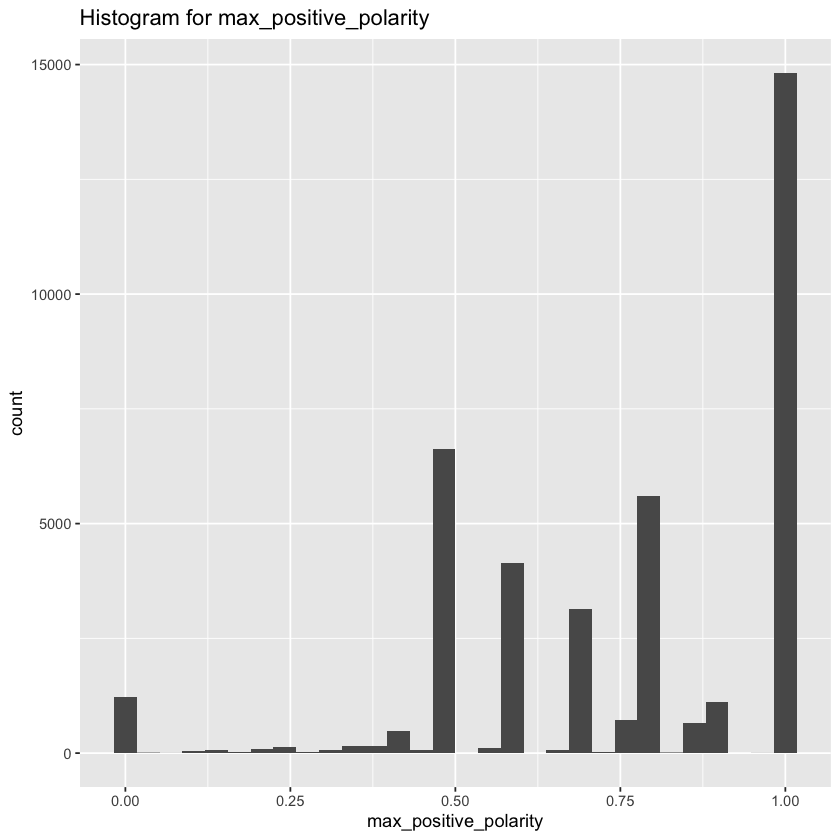

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


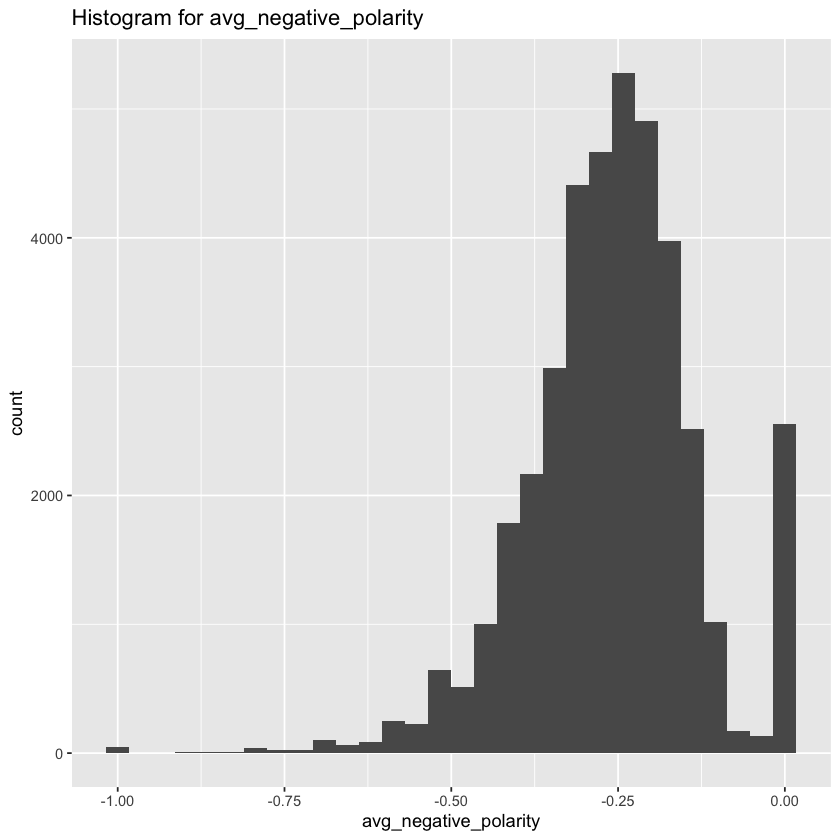

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


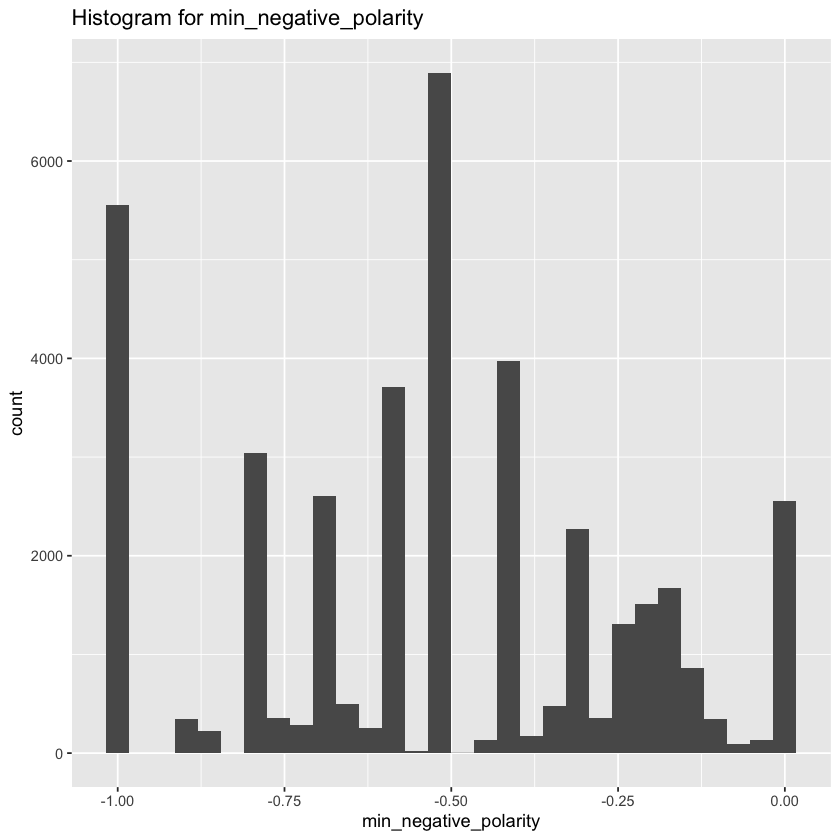

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


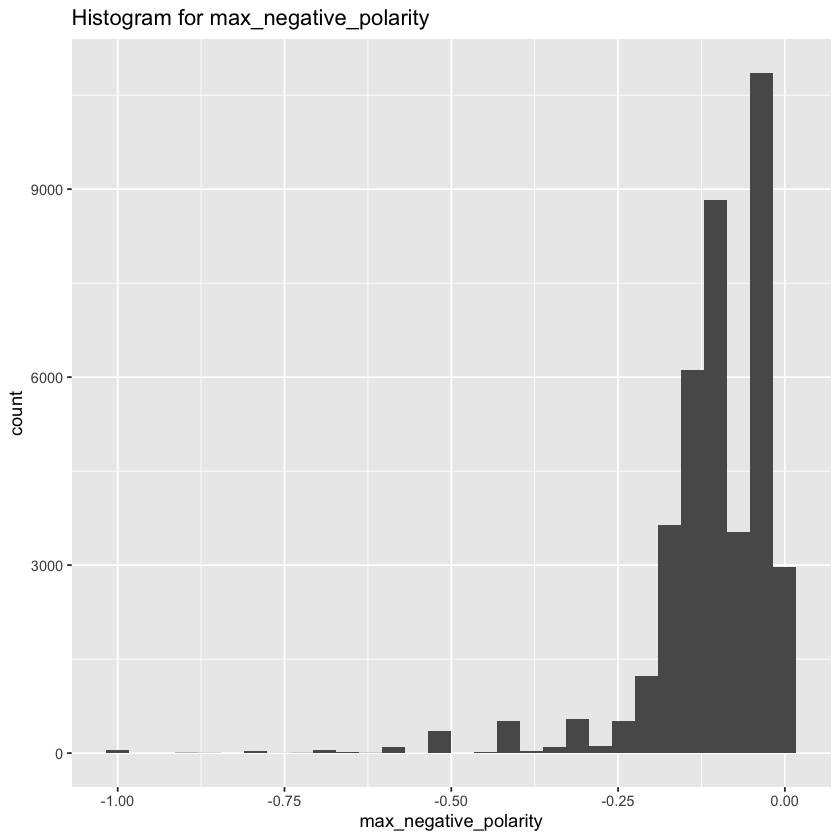

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


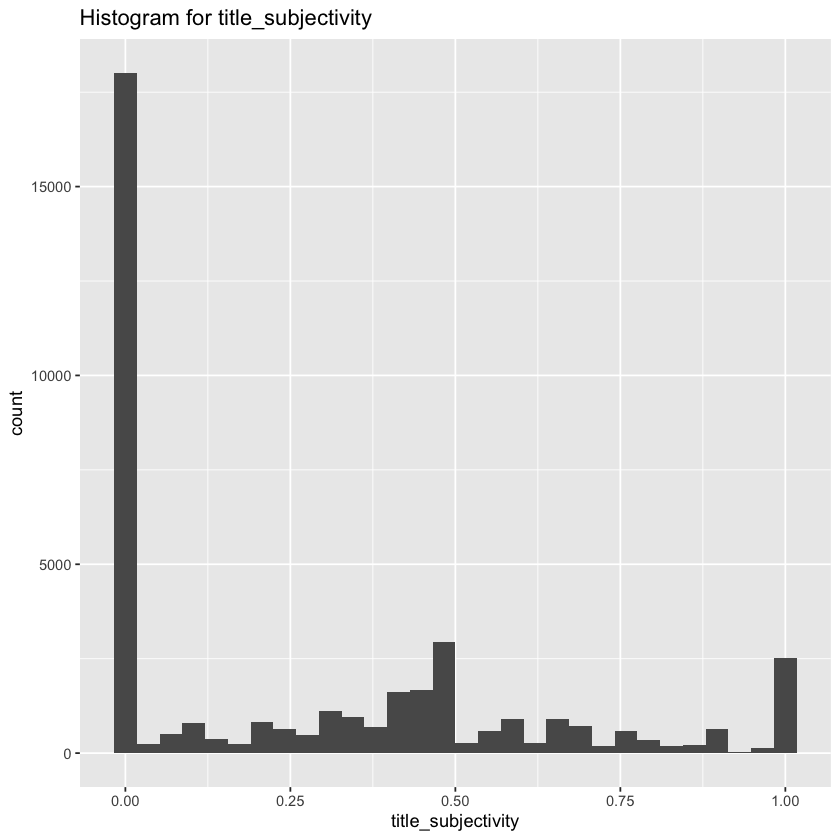

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


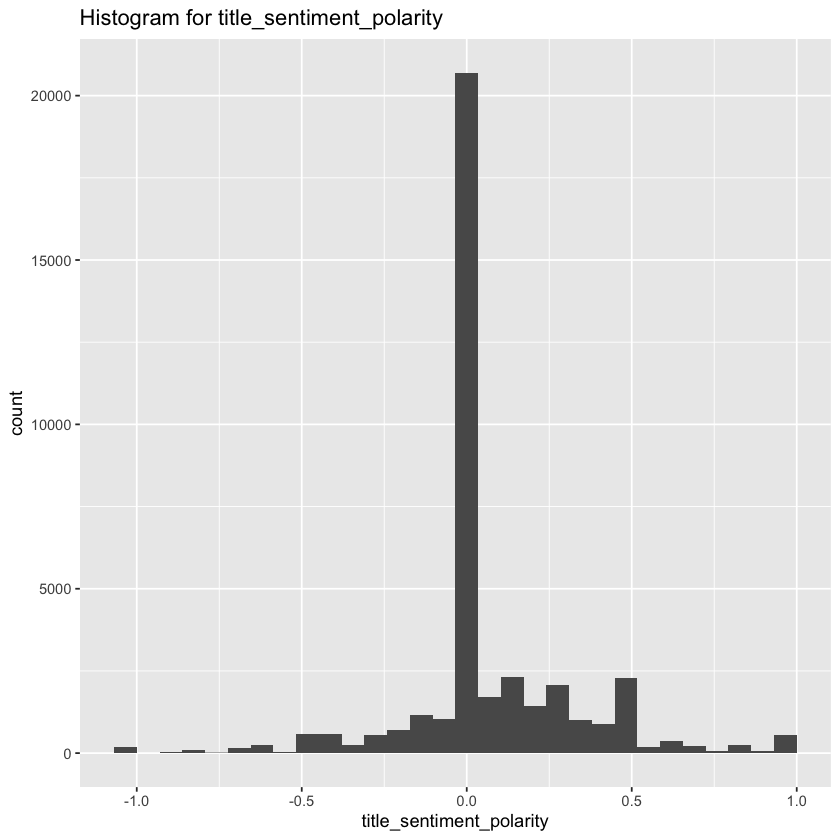

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


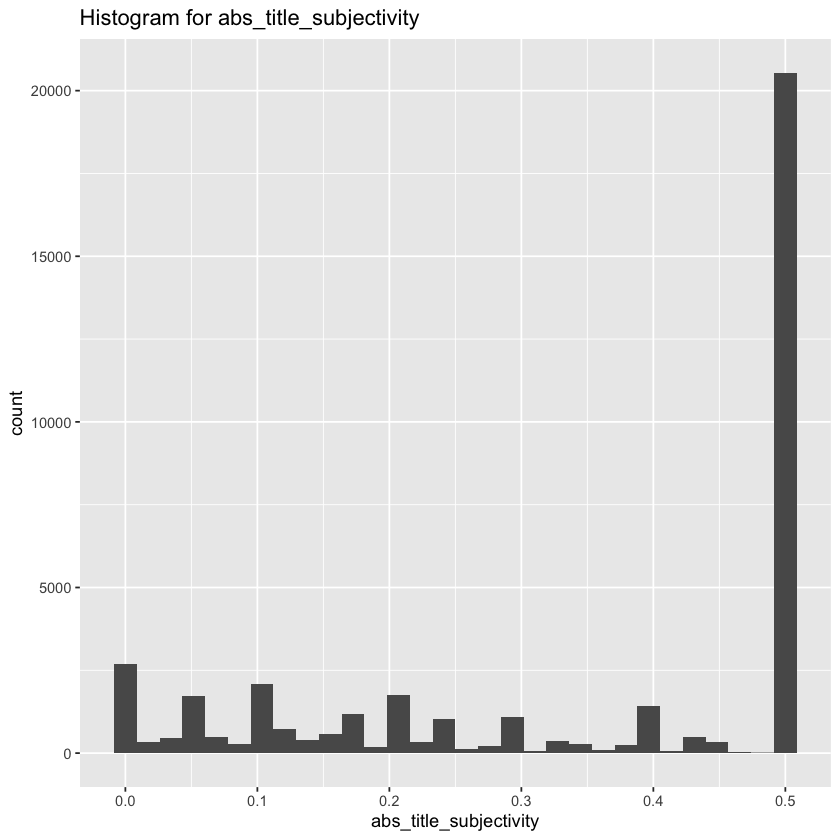

In [ ]:
# experiment
# Load the necessary libraries
library(GGally)
library(ggplot2)

# Select the numerical columns for the pairs plot
numerical_columns <- c(
  'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
  'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
  'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
  'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
  'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
  'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
  'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
  'global_sentiment_polarity', 'global_rate_positive_words',
  'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
  'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
  'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
  'title_subjectivity', 'title_sentiment_polarity',
  'abs_title_subjectivity', 'abs_title_sentiment_polarity'
)

# numerical_columns <- c(
#   'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
#   'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos')

categorical_columns <- c('day_of_week', 'news_category', 'is_weekend', 'year', 'month')



# Subset the DataFrame with selected columns
subset_data <- OnlineNewsPopularity[numerical_columns]

# Loop through numerical columns and create individual plots

for (col in numerical_columns) {
  print(ggplot(subset_data, aes_string(x = col)) +
          geom_histogram() +
          labs(title = paste("Histogram for", col)))
}



####
# OnlineNewsPopularity$day_of_week <- as.factor(OnlineNewsPopularity$day_of_week)
# Subset the DataFrame with selected columns
subset_data <- OnlineNewsPopularity[numerical_columns]

# Create the ggpairs plot
ggpairs(subset_data)
# This code will create a ggpairs plot with histograms for each numerical attribute and correlation numbers in the upper diagonal of the plot. Make sure to adjust the numerical_columns list to include only the attributes you want to analyze.



plot(ggpairs(subset_data))




In [ ]:
# Subset your data to include only the selected columns
subset_data <- OnlineNewsPopularity[numerical_columns]

# Create the pairs plot with color by 'news_category'
ggpairs(subset_data, aes(color = OnlineNewsPopularity$news_category))

In [ ]:


# Calculate correlation coefficients
correlation_matrix <- cor(OnlineNewsPopularity[numerical_columns])

# Get the number of columns in the correlation matrix
num_cols <- ncol(correlation_matrix)

# Filter and print correlations between -0.99 and -0.6
cat("Negative Correlations between -0.99 and -0.6:\n")
for (i in 1:(num_cols - 1)) {
  for (j in (i + 1):num_cols) {
    corr_value <- correlation_matrix[i, j]
    if (corr_value >= -0.99 && corr_value <= -0.6) {
      cat(sprintf("Correlation between %s and %s: %.2f\n", colnames(correlation_matrix)[i], colnames(correlation_matrix)[j], corr_value))
    }
  }
}

# Filter and print correlations between 0.6 and 0.99
cat("\nPositive Correlations between 0.6 and 0.99:\n")
for (i in 1:(num_cols - 1)) {
  for (j in (i + 1):num_cols) {
    corr_value <- correlation_matrix[i, j]
    if (corr_value >= 0.6 && corr_value <= 0.99) {
      cat(sprintf("Correlation between %s and %s: %.2f\n", colnames(correlation_matrix)[i], colnames(correlation_matrix)[j], corr_value))
    }
  }
}


In [ ]:

# Plot individual continuous predictors
gl1<-ggplot(OnlineNewsPopularity,aes(x=age,y=Fracture.Num)) +
  geom_point() + geom_smooth(method="loess",size=1,span=1) + 
  ggtitle("Age")

In [ ]:

# Select the numerical columns for correlation analysis
numerical_columns <- c(
  'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
  'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
  'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
  'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
  'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
  'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
  'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
  'global_sentiment_polarity', 'global_rate_positive_words',
  'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
  'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
  'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity',
  'title_subjectivity', 'title_sentiment_polarity',
  'abs_title_subjectivity', 'abs_title_sentiment_polarity'
)

# Calculate correlation coefficients
correlation_matrix <- cor(OnlineNewsPopularity[numerical_columns])

# Find columns with correlation > -1 and < -0.75
high_corr_pairs_positive <- which(
  upper.tri(correlation_matrix, diag = TRUE) &
  correlation_matrix > -1 & correlation_matrix < -0.75,
  arr.ind = TRUE
)

# Find columns with correlation > 0.75 and < 1
high_corr_pairs_negative <- which(
  upper.tri(correlation_matrix, diag = TRUE) &
  correlation_matrix > 0.75 & correlation_matrix < 1,
  arr.ind = TRUE
)

# Display the highly correlated pairs and their correlation values (both positive and negative)
for (i in 1:nrow(high_corr_pairs_positive)) {
  col1 <- colnames(correlation_matrix)[high_corr_pairs_positive[i, 1]]
  col2 <- colnames(correlation_matrix)[high_corr_pairs_positive[i, 2]]
  corr_value <- correlation_matrix[high_corr_pairs_positive[i, 1], high_corr_pairs_positive[i, 2]]
  cat(sprintf("Positive Correlation between %s and %s: %.2f\n", col1, col2, corr_value))
}

for (i in 1:nrow(high_corr_pairs_negative)) {
  col1 <- colnames(correlation_matrix)[high_corr_pairs_negative[i, 1]]
  col2 <- colnames(correlation_matrix)[high_corr_pairs_negative[i, 2]]
  corr_value <- correlation_matrix[high_corr_pairs_negative[i, 1], high_corr_pairs_negative[i, 2]]
  cat(sprintf("Negative Correlation between %s and %s: %.2f\n", col1, col2, corr_value))
}

# Remove the high correlation columns from the dataset
filtered_data <- OnlineNewsPopularity[, !names(OnlineNewsPopularity) %in% colnames(correlation_matrix)[c(high_corr_pairs_positive[, 1], high_corr_pairs_negative[, 1])]]

# Print the filtered dataset
print(filtered_data)


In [ ]:
# Subset the dataset with selected columns
 # Convert categorical columns to factors
# subset_data[categorical_columns] <- lapply(subset_data[categorical_columns], factor)

# # Create the ggpairs plot
# ggpairs(
#   subset_data,
#   columns = numerical_columns,
#   aes(color = is_weekend),
#   title = "Pairs Plot for Numerical Variables",
#   lower = list(continuous = "points"),
#   upper = list(continuous = "blank"),
#   diag = list(continuous = "density"),
#   legend = c("color"),
#   axisLabels = "none"
# )

In [ ]:
# Select the numeric columns you want to include in the correlation analysis
numeric_columns <- OnlineNewsPopularity[, sapply(OnlineNewsPopularity, is.numeric)]

# Calculate the correlation coefficients with 'year'
correlation_with_year <- cor(numeric_columns, OnlineNewsPopularity$year)

# # Print the correlation coefficients
print("Correlation with 'year':")
print(correlation_with_year)



In [ ]:
library(GGally)

# Define the columns you want to include in each plot
column_sets <- list(
  c("timedelta", "n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words"),
  c("n_non_stop_unique_tokens", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos"),
  c("average_token_length", "num_keywords", "kw_min_min", "kw_max_min", "kw_avg_min"),
  c("kw_min_max", "kw_max_max", "kw_avg_max", "kw_min_avg", "kw_max_avg"),
  c("kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess")
)


In [ ]:
print(data_types)

In [ ]:
# # write the data to csv
# write.csv(OnlineNewsPopularity, file = "../Data/tim_clean_mashable_data.csv")